##### Target :- 
- Predict the Reliance Industries Stock Price for the next 1 year using forcasting technique.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

- Dataset :- RELIANCE_STOCK.csv

In [2]:
#Read datset
data = pd.read_csv("RELIANCE_STOCK.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.684193,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.060585,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.316597,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.714115,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.096405,128426756.0
...,...,...,...,...,...,...,...
5750,2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2524.050049,2764496.0
5751,2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2544.699951,2659749.0
5752,2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,2544.449951,3442509.0
5753,2022-12-29,2527.000000,2548.899902,2525.500000,2543.300049,2543.300049,3198493.0


In [3]:
#Round off values.
data = data.round(2)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.75,38.94,36.75,38.94,29.68,28802010.0
1,2000-01-04,39.98,42.06,38.88,42.06,32.06,61320457.0
2,2000-01-05,39.71,44.55,39.71,43.71,33.32,173426953.0
3,2000-01-06,44.72,46.53,44.72,45.54,34.71,101355113.0
4,2000-01-07,45.64,49.19,45.33,48.67,37.10,128426756.0
...,...,...,...,...,...,...,...
5750,2022-12-26,2514.75,2542.00,2492.40,2524.05,2524.05,2764496.0
5751,2022-12-27,2530.00,2548.80,2515.25,2544.70,2544.70,2659749.0
5752,2022-12-28,2538.00,2549.80,2521.50,2544.45,2544.45,3442509.0
5753,2022-12-29,2527.00,2548.90,2525.50,2543.30,2543.30,3198493.0


In [4]:
#Droping unnecessary variables.

data.drop(["Open","High","Low","Close"], axis=1,inplace=True)
data

,Date,Adj Close,Volume
0,2000-01-03,29.68,28802010.0
1,2000-01-04,32.06,61320457.0
2,2000-01-05,33.32,173426953.0
3,2000-01-06,34.71,101355113.0
4,2000-01-07,37.10,128426756.0
...,...,...,...
5750,2022-12-26,2524.05,2764496.0
5751,2022-12-27,2544.70,2659749.0
5752,2022-12-28,2544.45,3442509.0
5753,2022-12-29,2543.30,3198493.0


#### EDA

In [5]:
data.shape

(5755, 3)

- Dataset contains 5755 observations and 3 variables.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5755 non-null   object 
 1   Adj Close  5745 non-null   float64
 2   Volume     5745 non-null   float64
dtypes: float64(2), object(1)
memory usage: 135.0+ KB


- Date datatype is not correct.

In [7]:
#Describe numerical variables.
data.describe()

,Adj Close,Volume
count,5745.000000,5.745000e+03
mean,615.592590,1.681692e+07
std,682.151453,1.809928e+07
min,23.960000,0.000000e+00
25%,89.120000,6.334809e+06
50%,418.400000,1.016516e+07
75%,638.090000,2.036854e+07
max,2811.390000,2.918015e+08


In [8]:
#Checking null observations.
data.isna().sum()

Date          0
Adj Close    10
Volume       10
dtype: int64

- Variable 'Adj Close' and 'Volume' contains 10 null observations.

In [9]:
#Checking null observations.
data[data['Adj Close'].isna()]

,Date,Adj Close,Volume
855,2003-04-14,NaN,NaN
1125,2004-04-26,NaN,NaN
1247,2004-10-13,NaN,NaN
2563,2010-02-06,NaN,NaN
3041,2012-01-07,NaN,NaN
3080,2012-03-03,NaN,NaN
3210,2012-09-08,NaN,NaN
3252,2012-11-11,NaN,NaN
3589,2014-03-22,NaN,NaN
3818,2015-02-28,NaN,NaN


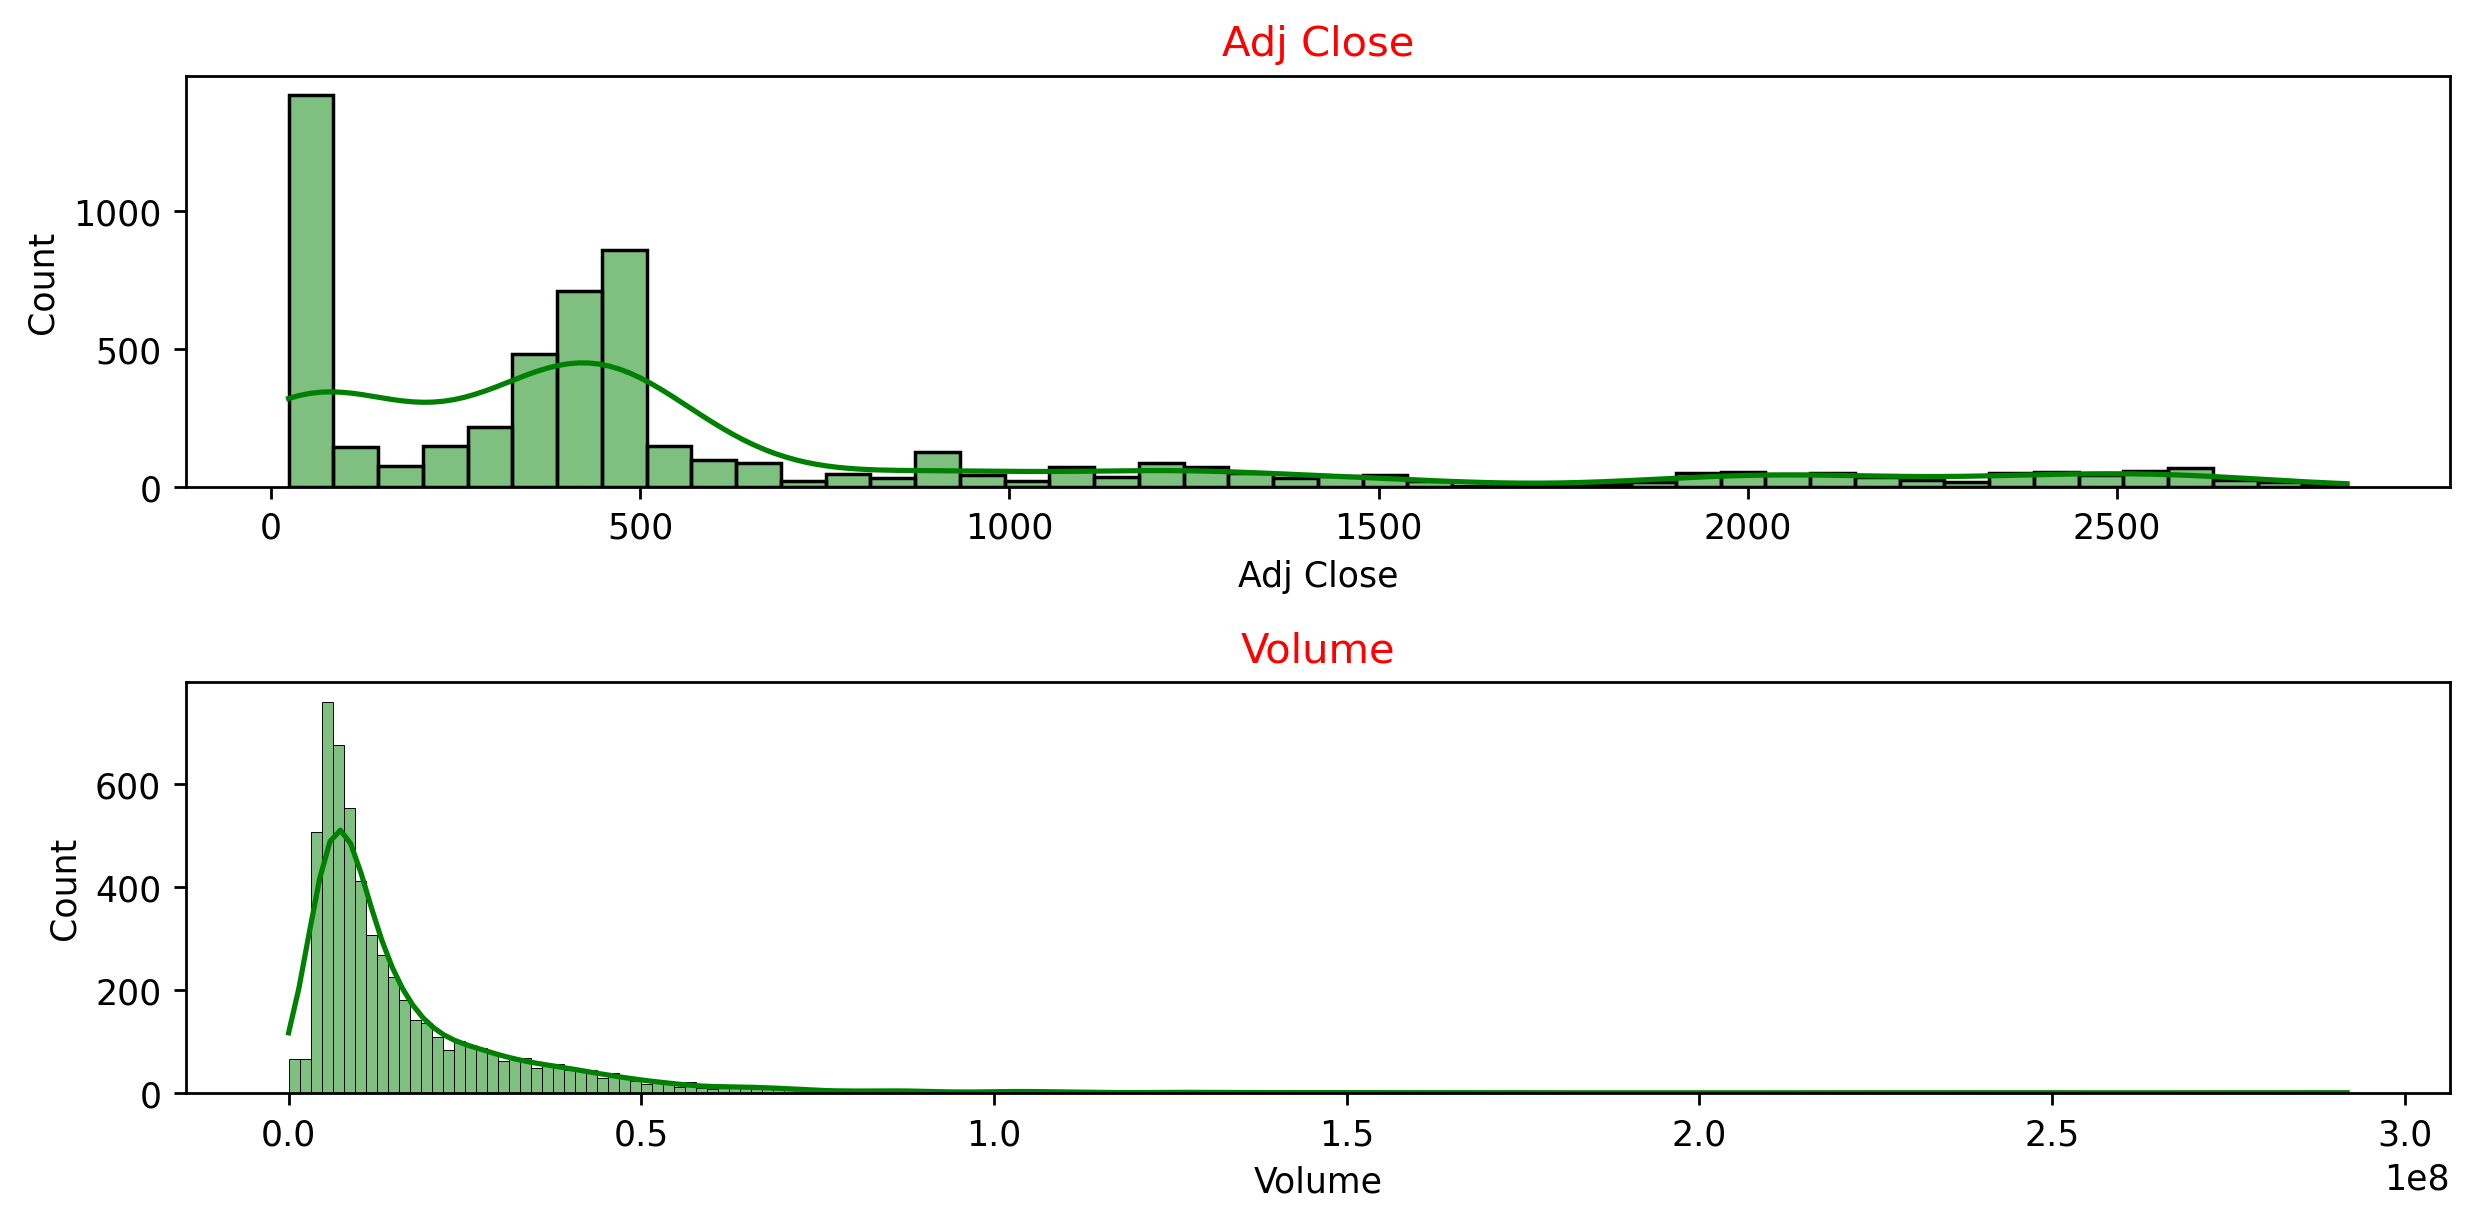

In [10]:
#Checking data is skewed or not for imputation.

plt.figure(figsize=(10,5), dpi=250)
plt.subplot(211)
sns.histplot(data['Adj Close'], kde=True, color='g')
plt.title('Adj Close', c='r')
plt.subplot(212)
sns.histplot(data['Volume'], kde=True, color='g')
plt.title('Volume', c='r')
plt.tight_layout()

- In above graph data is positively skewed so we can replace nan values with median.

In [11]:
#Checking median values.
data.median()

Adj Close         418.4
Volume       10165162.0
dtype: float64

In [12]:
#Filling null values with median value because data is skewed.

data['Adj Close'].fillna(data['Adj Close'].median(), inplace=True)
data['Volume'].fillna(data['Volume'].median(), inplace=True)

In [13]:
#Rechecking null observations.
data.isna().sum()

Date         0
Adj Close    0
Volume       0
dtype: int64

In [14]:
#Data describe after imputation.
data.describe()

,Adj Close,Volume
count,5755.000000,5.755000e+03
mean,615.249944,1.680536e+07
std,681.607921,1.808567e+07
min,23.960000,0.000000e+00
25%,90.615000,6.342405e+06
50%,418.400000,1.016516e+07
75%,636.485000,2.032690e+07
max,2811.390000,2.918015e+08


In [15]:
#Checking duplicate observations.
data[data.duplicated()]

,Date,Adj Close,Volume


- No duplicate observations found.

In [16]:
#Checking correlation.
data.corr()

,Adj Close,Volume
Adj Close,1.00000,-0.31682
Volume,-0.31682,1.00000


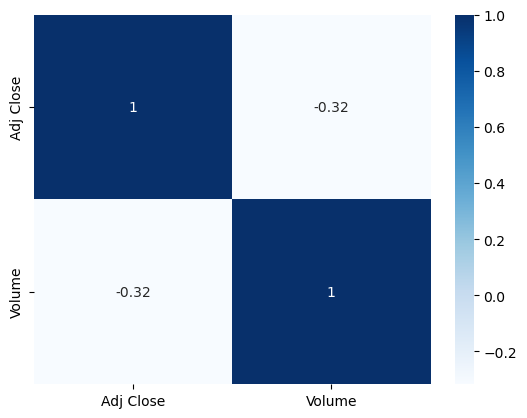

In [17]:
#Correlatin using heatmap.
sns.heatmap(data.corr(), annot=True, cmap='Blues');

- There is negative 32% correlation between independent variables.

In [18]:
#Converting the Date datatype to datetime.

data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Adj Close,Volume
0,2000-01-03,29.68,28802010.0
1,2000-01-04,32.06,61320457.0
2,2000-01-05,33.32,173426953.0
3,2000-01-06,34.71,101355113.0
4,2000-01-07,37.10,128426756.0
...,...,...,...
5750,2022-12-26,2524.05,2764496.0
5751,2022-12-27,2544.70,2659749.0
5752,2022-12-28,2544.45,3442509.0
5753,2022-12-29,2543.30,3198493.0


In [19]:
#Extracting 'Month' and 'Year' from 'Date' variable.

data['Month'] = data.Date.dt.strftime("%b")
data['Year'] = data.Date.dt.strftime("%Y")
data

,Date,Adj Close,Volume,Month,Year
0,2000-01-03,29.68,28802010.0,Jan,2000
1,2000-01-04,32.06,61320457.0,Jan,2000
2,2000-01-05,33.32,173426953.0,Jan,2000
3,2000-01-06,34.71,101355113.0,Jan,2000
4,2000-01-07,37.10,128426756.0,Jan,2000
...,...,...,...,...,...
5750,2022-12-26,2524.05,2764496.0,Dec,2022
5751,2022-12-27,2544.70,2659749.0,Dec,2022
5752,2022-12-28,2544.45,3442509.0,Dec,2022
5753,2022-12-29,2543.30,3198493.0,Dec,2022


In [20]:
#Set 'Date' as a index.

data.set_index('Date', inplace=True)
data

,Adj Close,Volume,Month,Year
Date,,,,
2000-01-03,29.68,28802010.0,Jan,2000
2000-01-04,32.06,61320457.0,Jan,2000
2000-01-05,33.32,173426953.0,Jan,2000
2000-01-06,34.71,101355113.0,Jan,2000
2000-01-07,37.10,128426756.0,Jan,2000
...,...,...,...,...
2022-12-26,2524.05,2764496.0,Dec,2022
2022-12-27,2544.70,2659749.0,Dec,2022
2022-12-28,2544.45,3442509.0,Dec,2022


#### Visualization

In [21]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

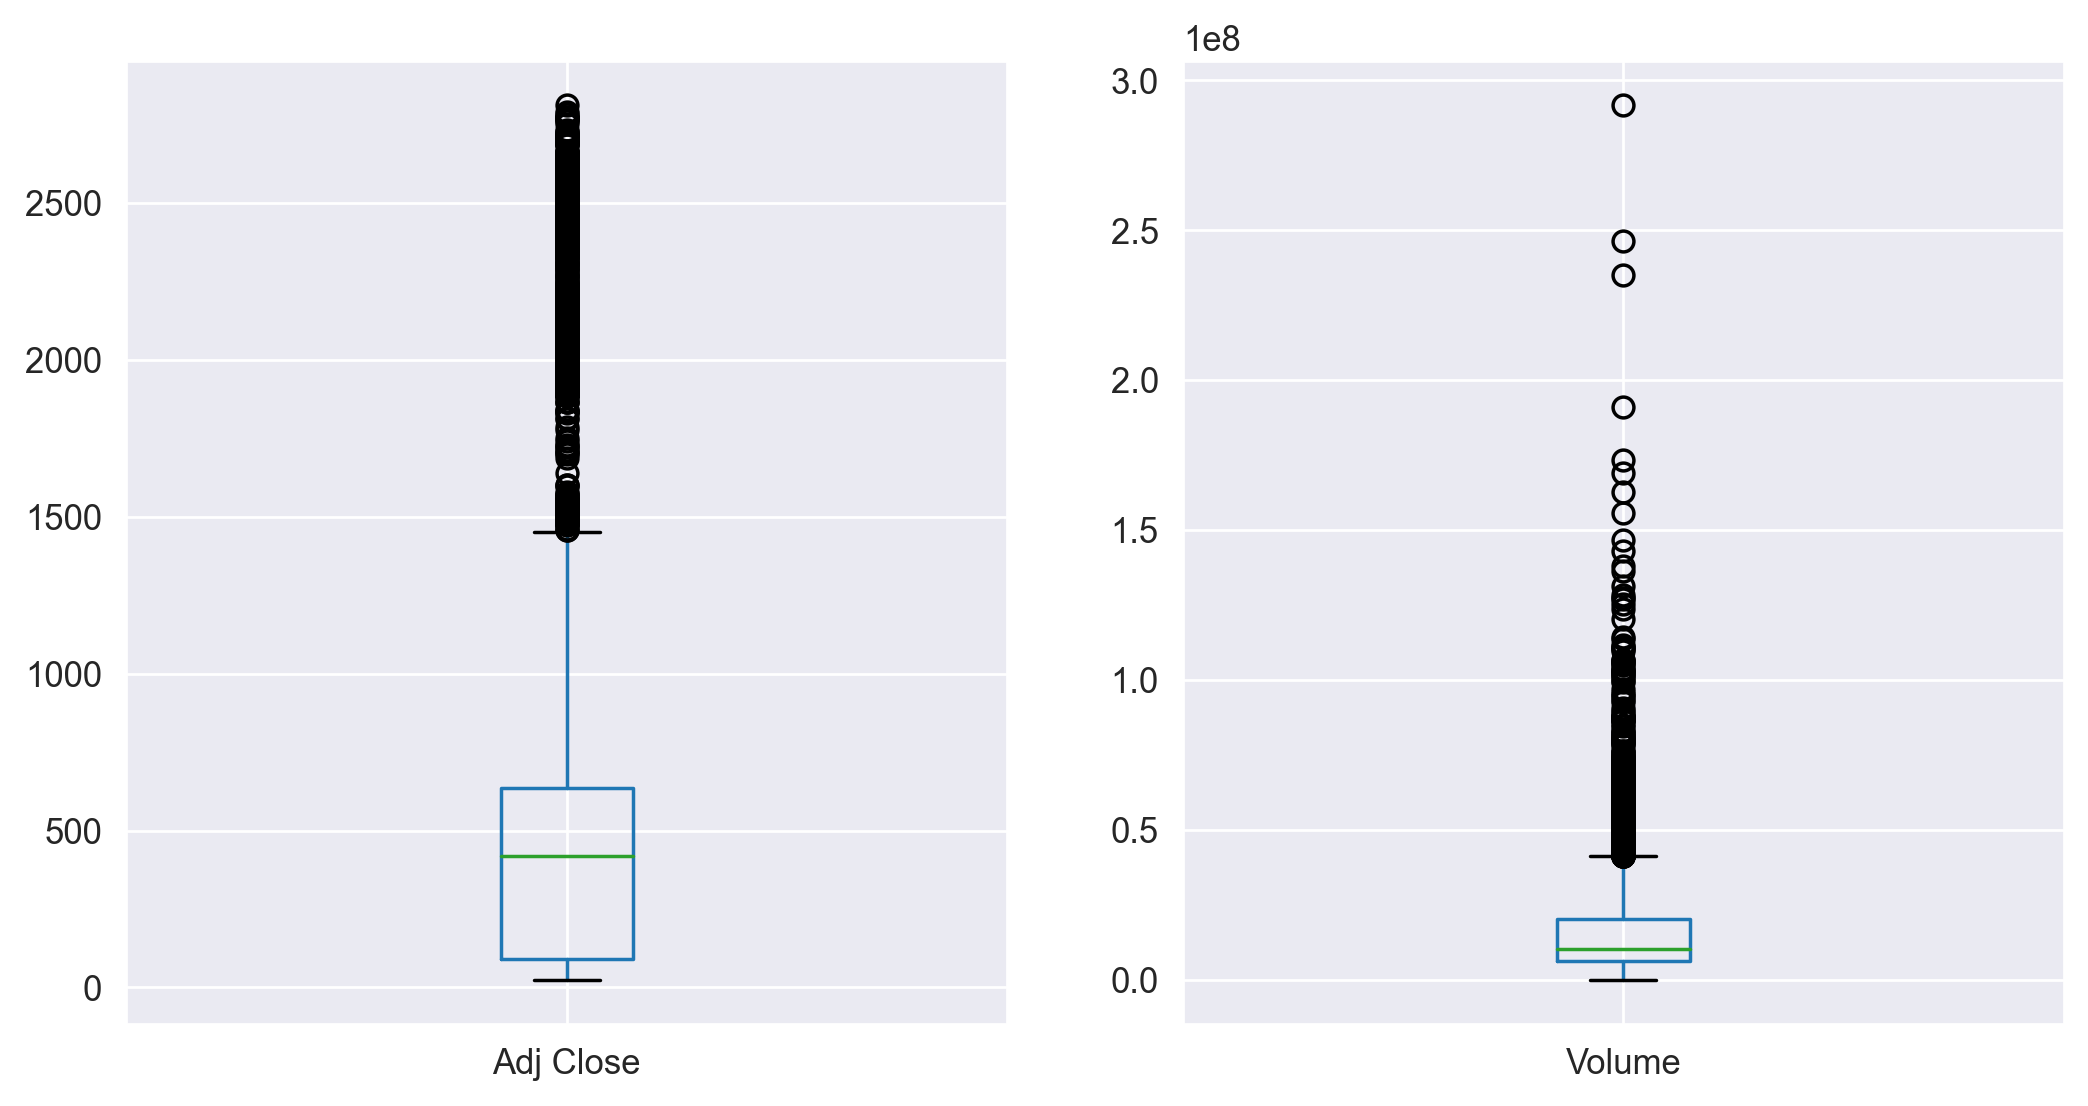

In [22]:
#Checking outliers using boxplot.

plt.subplot(121)
data[['Adj Close']].boxplot()
plt.subplot(122)
data[['Volume']].boxplot();

In [23]:
#Checking percentage of outliers present in dataset.

print("Outliers present in 'Adj Close' = ", len(data[data['Adj Close'] > 1455.29]))
print("% of outlier present in 'Adj Close' = ", "%s%%"%round(((704/5755)*100), 2))
print("\n")
print("Outliers present in 'Volume' = ", len(data[data['Volume'] > 41303642.5]))
print("% of outlier present in 'Adj Close' = ", "%s%%"%round(((470/5755)*100), 2))

Outliers present in 'Adj Close' =  704
% of outlier present in 'Adj Close' =  12.23%


Outliers present in 'Volume' =  470
% of outlier present in 'Adj Close' =  8.17%


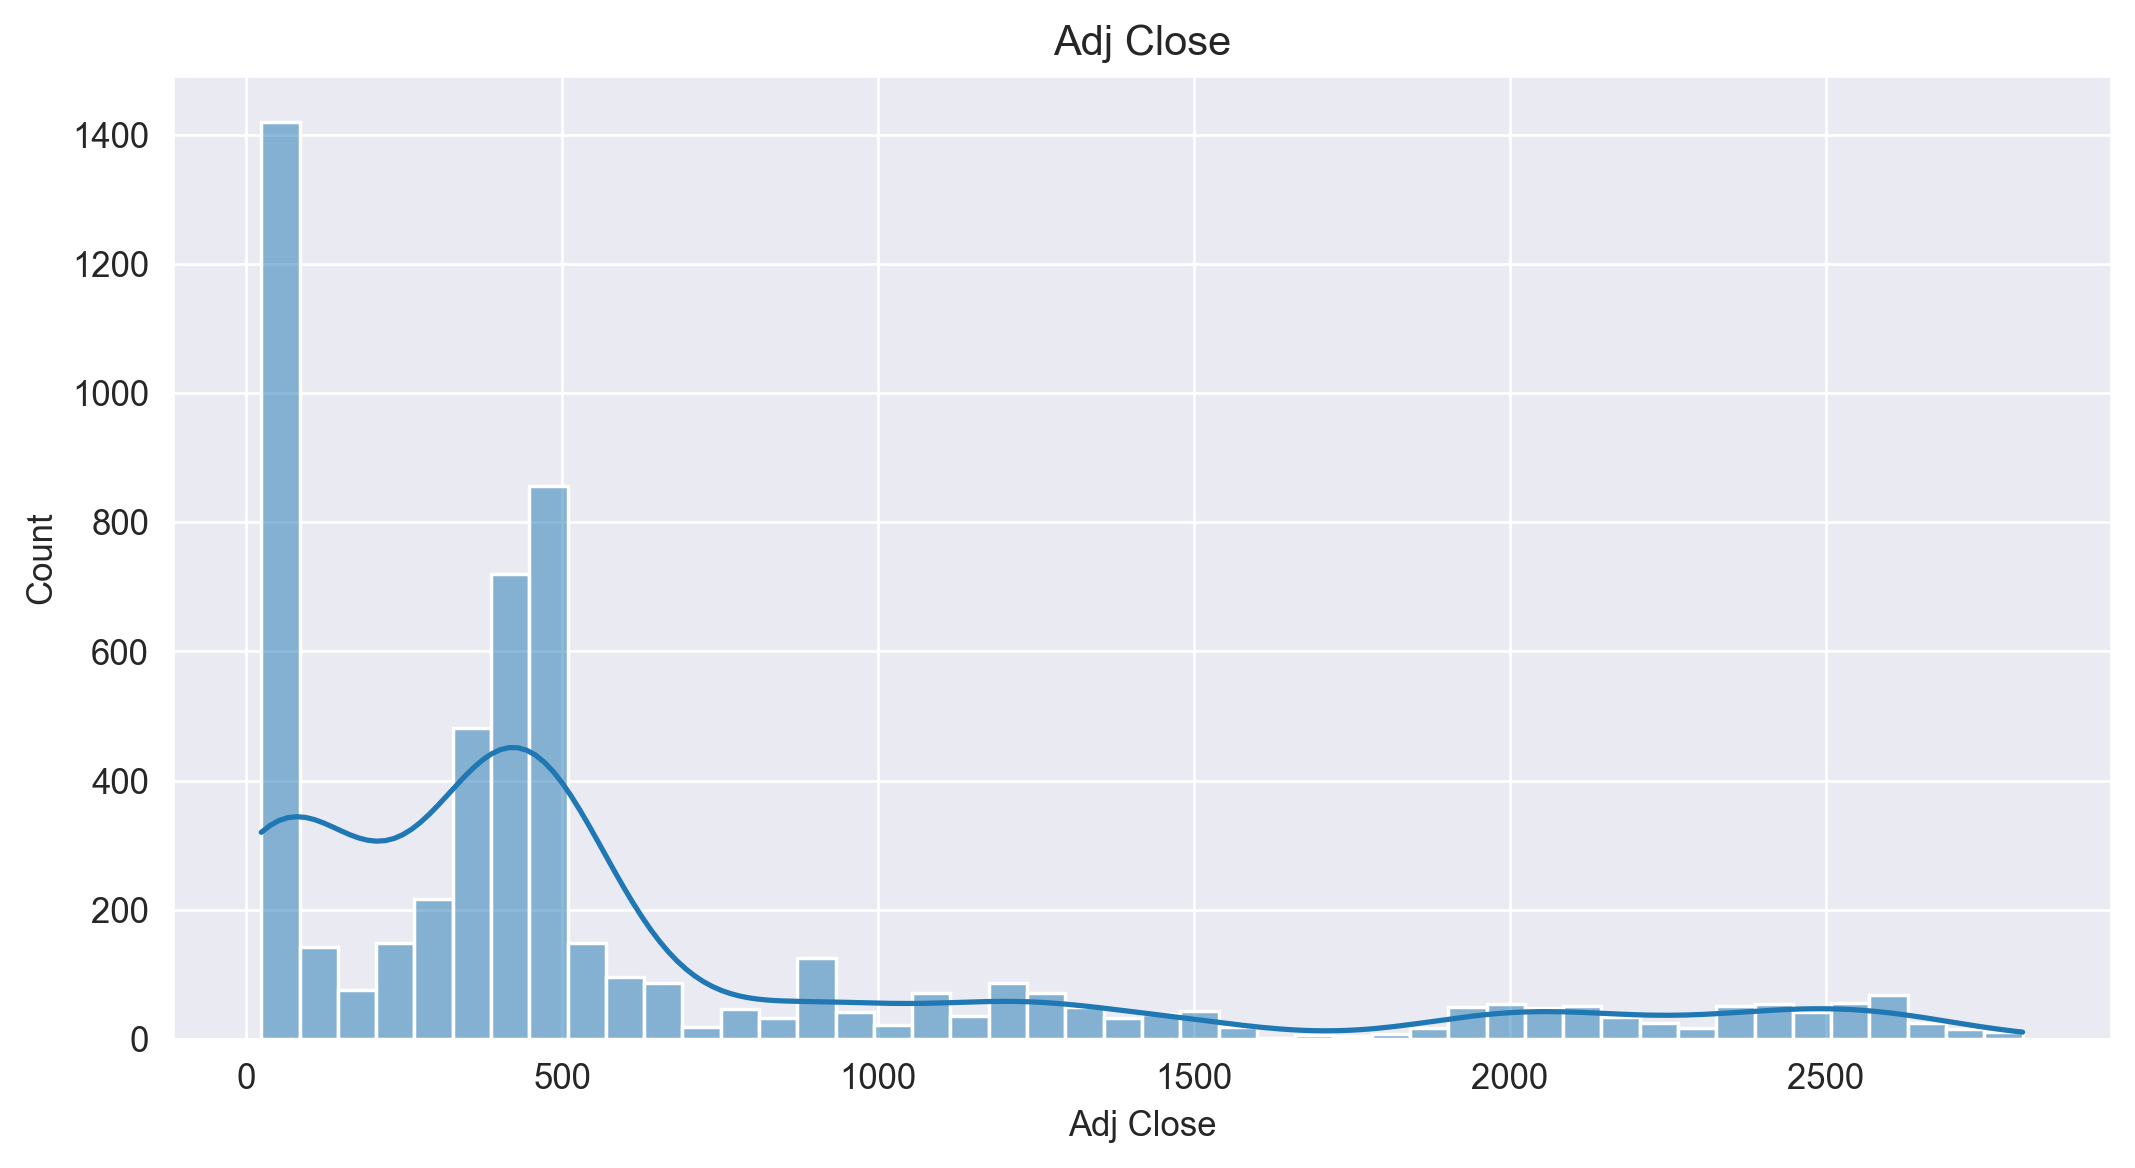

In [24]:
#Checking data distribution using histogram.

sns.histplot(data['Adj Close'], kde=True);
plt.title('Adj Close');

- 'Adj Close' data is positively skewed.

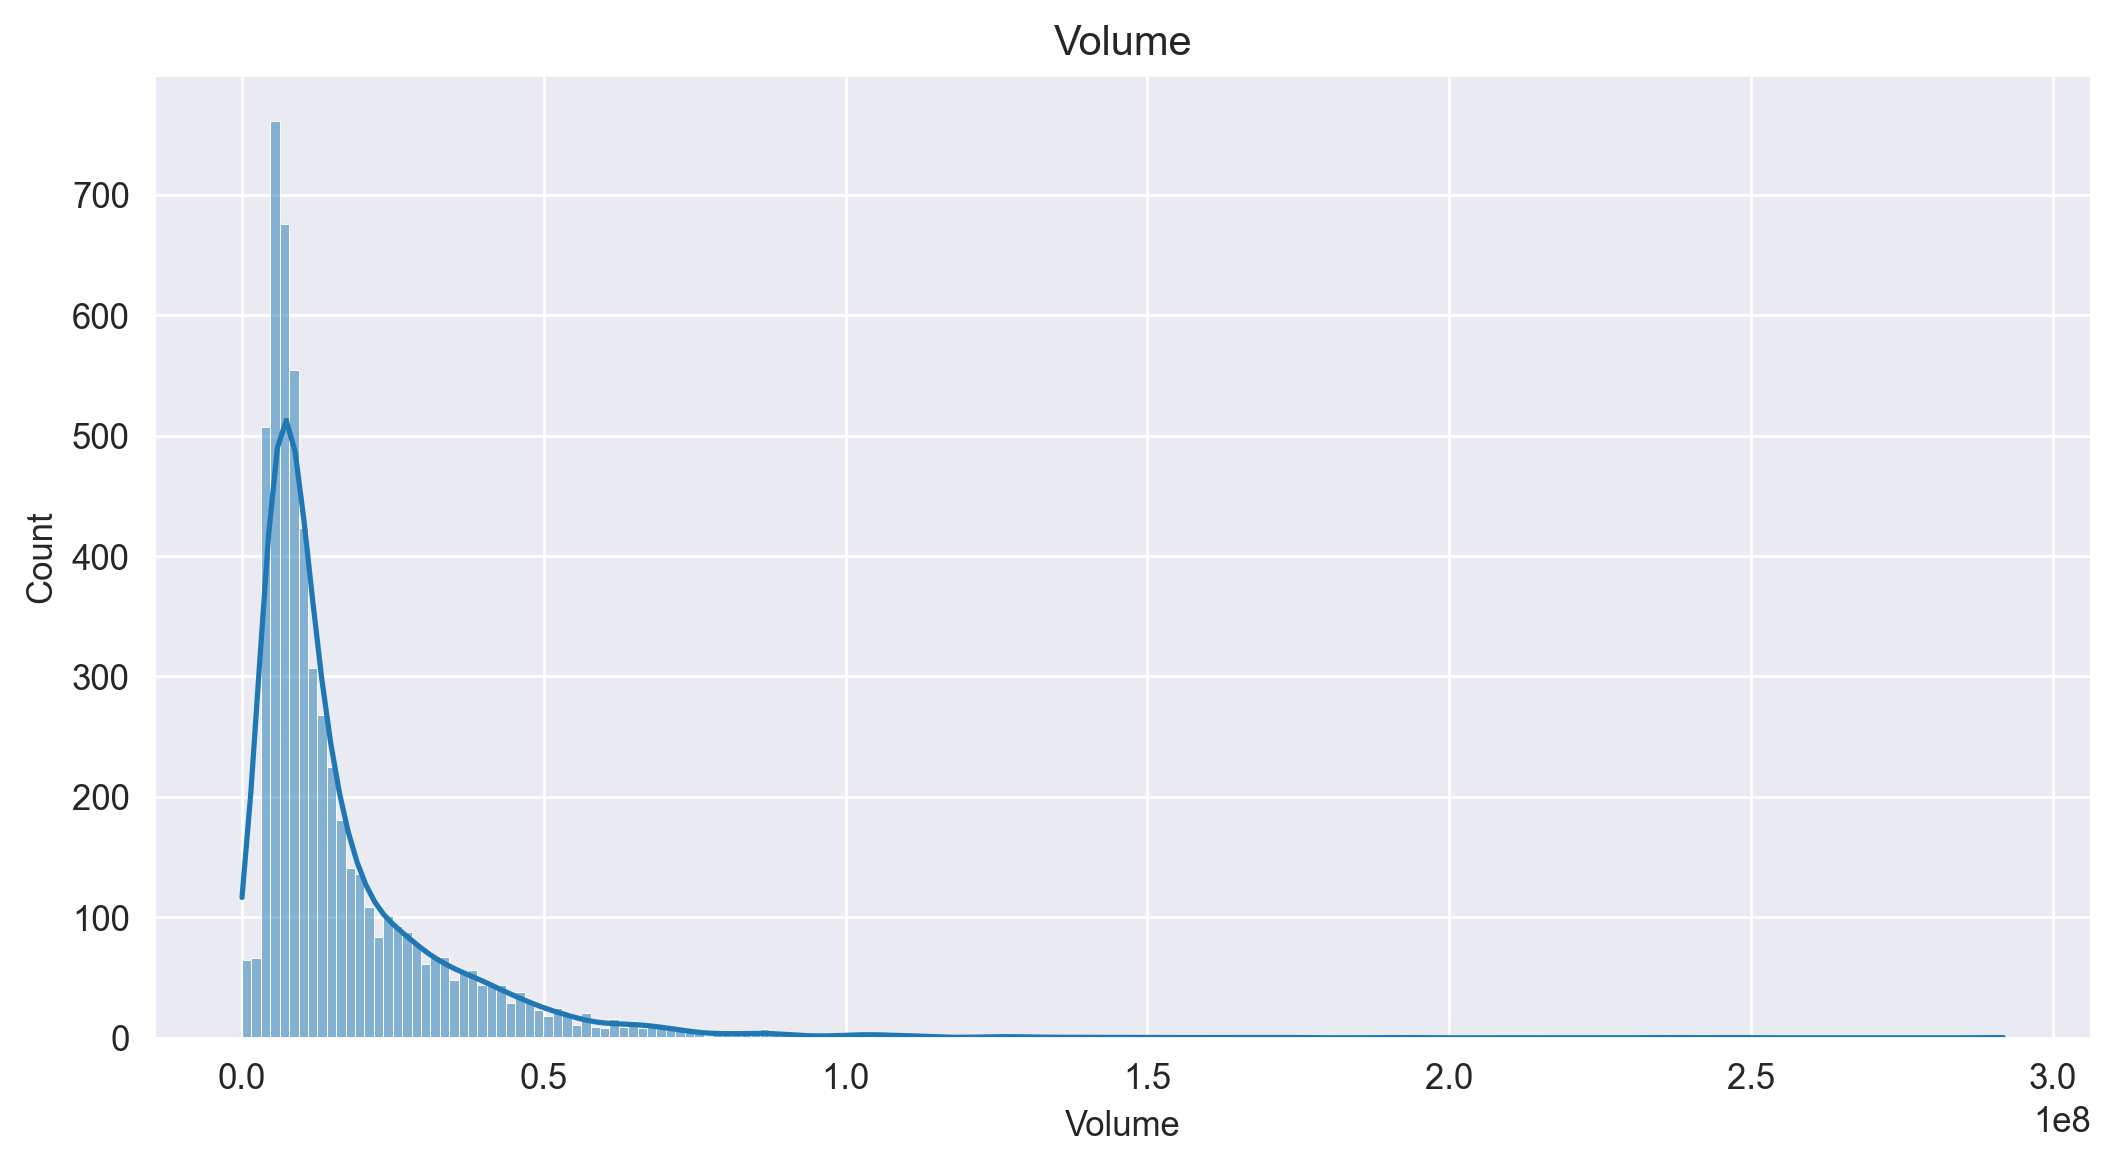

In [25]:
#Checking data distribution using histogram.

sns.histplot(data['Volume'], kde=True);
plt.title('Volume');

- 'Volume' data is positively skewed.

#### Transformation

- Log Transformation

In [26]:
#Applying log transformation to remove outliers and to get normal distribution.

data['log_Adj_Close'] = np.log(data['Adj Close'])
data['log_Volume'] = np.log(data['Volume'])
data

,Adj Close,Volume,Month,Year,log_Adj_Close,log_Volume
Date,,,,,,
2000-01-03,29.68,28802010.0,Jan,2000,3.390473,17.175956
2000-01-04,32.06,61320457.0,Jan,2000,3.467609,17.931624
2000-01-05,33.32,173426953.0,Jan,2000,3.506158,18.971267
2000-01-06,34.71,101355113.0,Jan,2000,3.547028,18.434141
2000-01-07,37.10,128426756.0,Jan,2000,3.613617,18.670869
...,...,...,...,...,...,...
2022-12-26,2524.05,2764496.0,Dec,2022,7.833620,14.832369
2022-12-27,2544.70,2659749.0,Dec,2022,7.841768,14.793742
2022-12-28,2544.45,3442509.0,Dec,2022,7.841670,15.051711


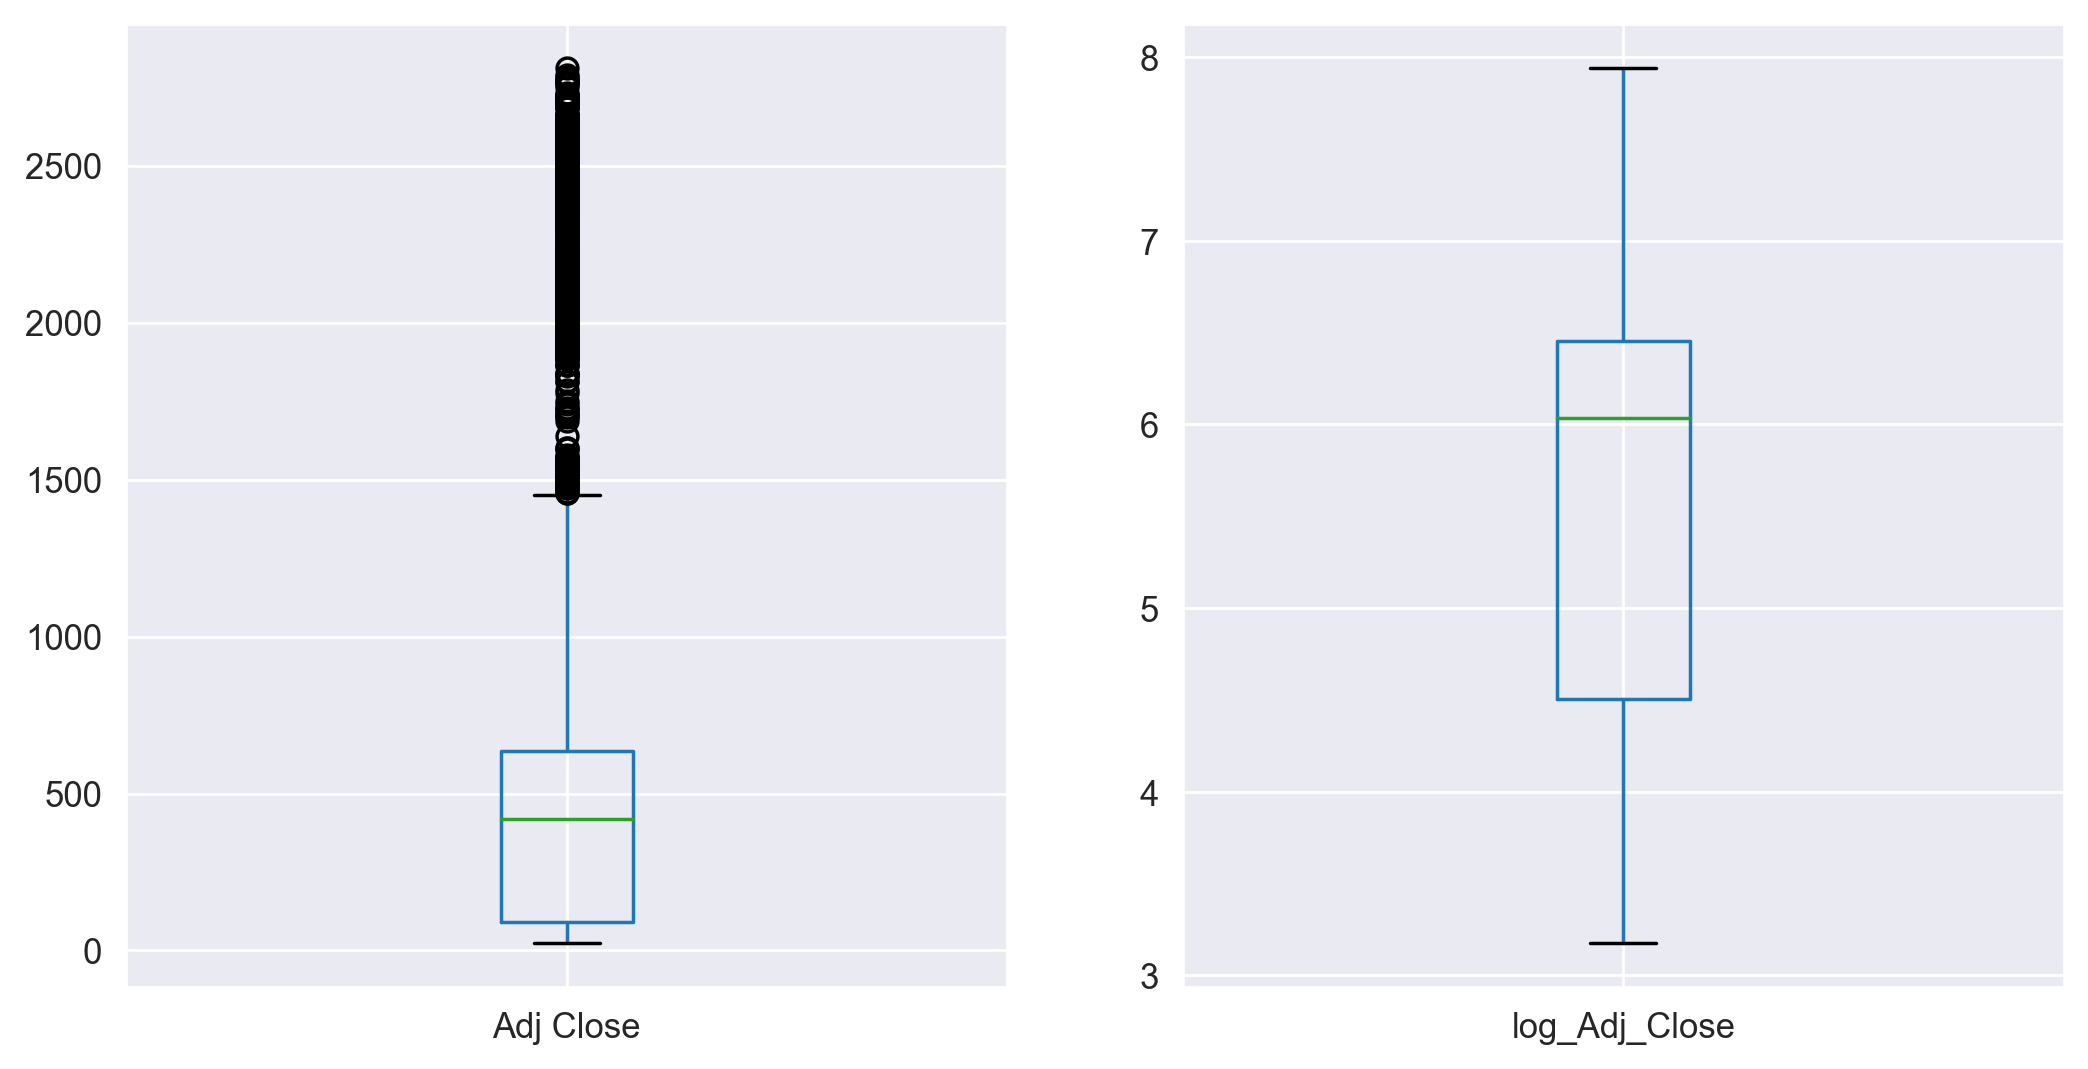

In [27]:
#Boxplot after applying log transformation on 'Adj Close'.

plt.subplot(121)
data[['Adj Close']].boxplot()
plt.subplot(122)
data[['log_Adj_Close']].boxplot();

- After log transformation no outliers present in 'Adj Close'

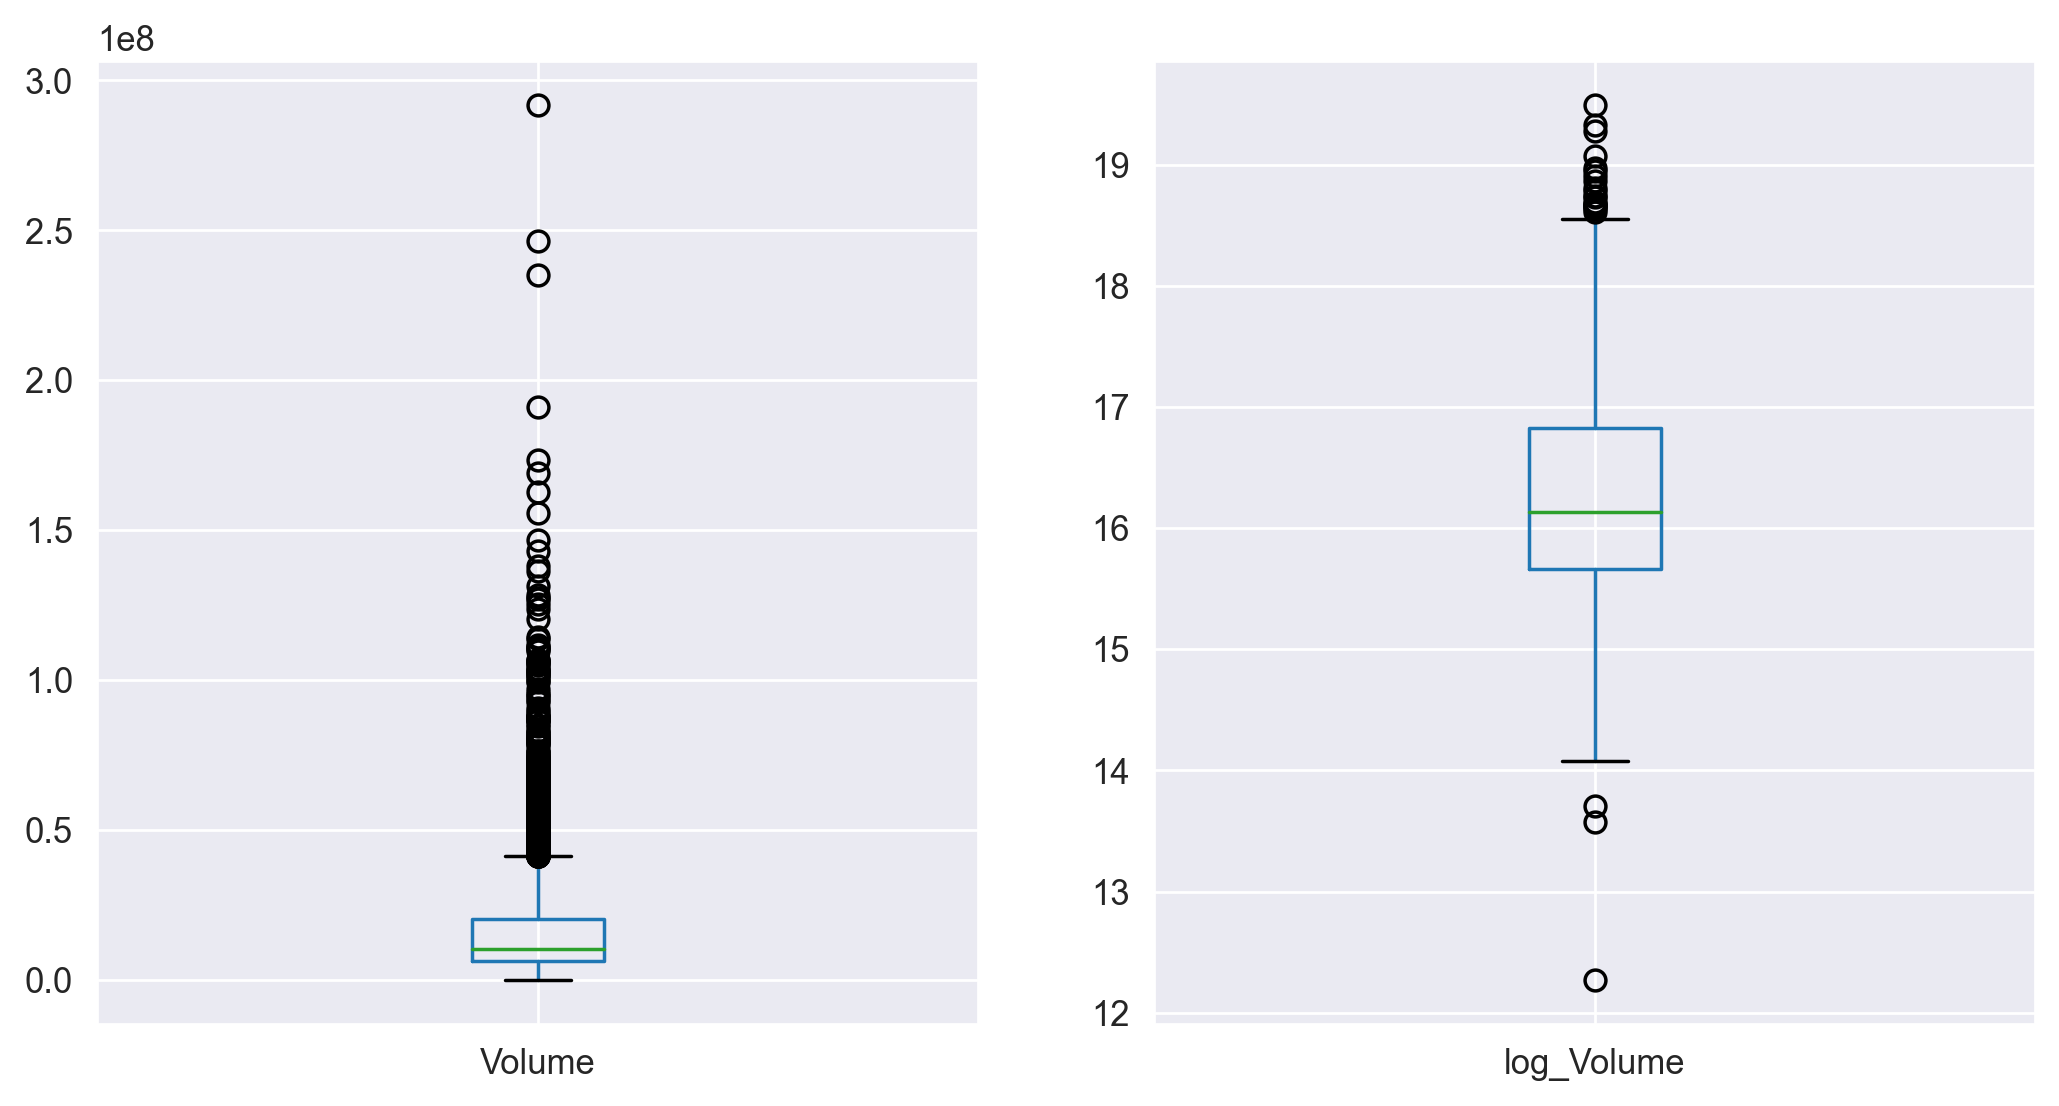

In [28]:
#Boxplot after applying log transformation on 'Volume'.

plt.subplot(121)
data[['Volume']].boxplot()
plt.subplot(122)
data[['log_Volume']].boxplot();

- After log transformation outliers are reduced in 'Volume'

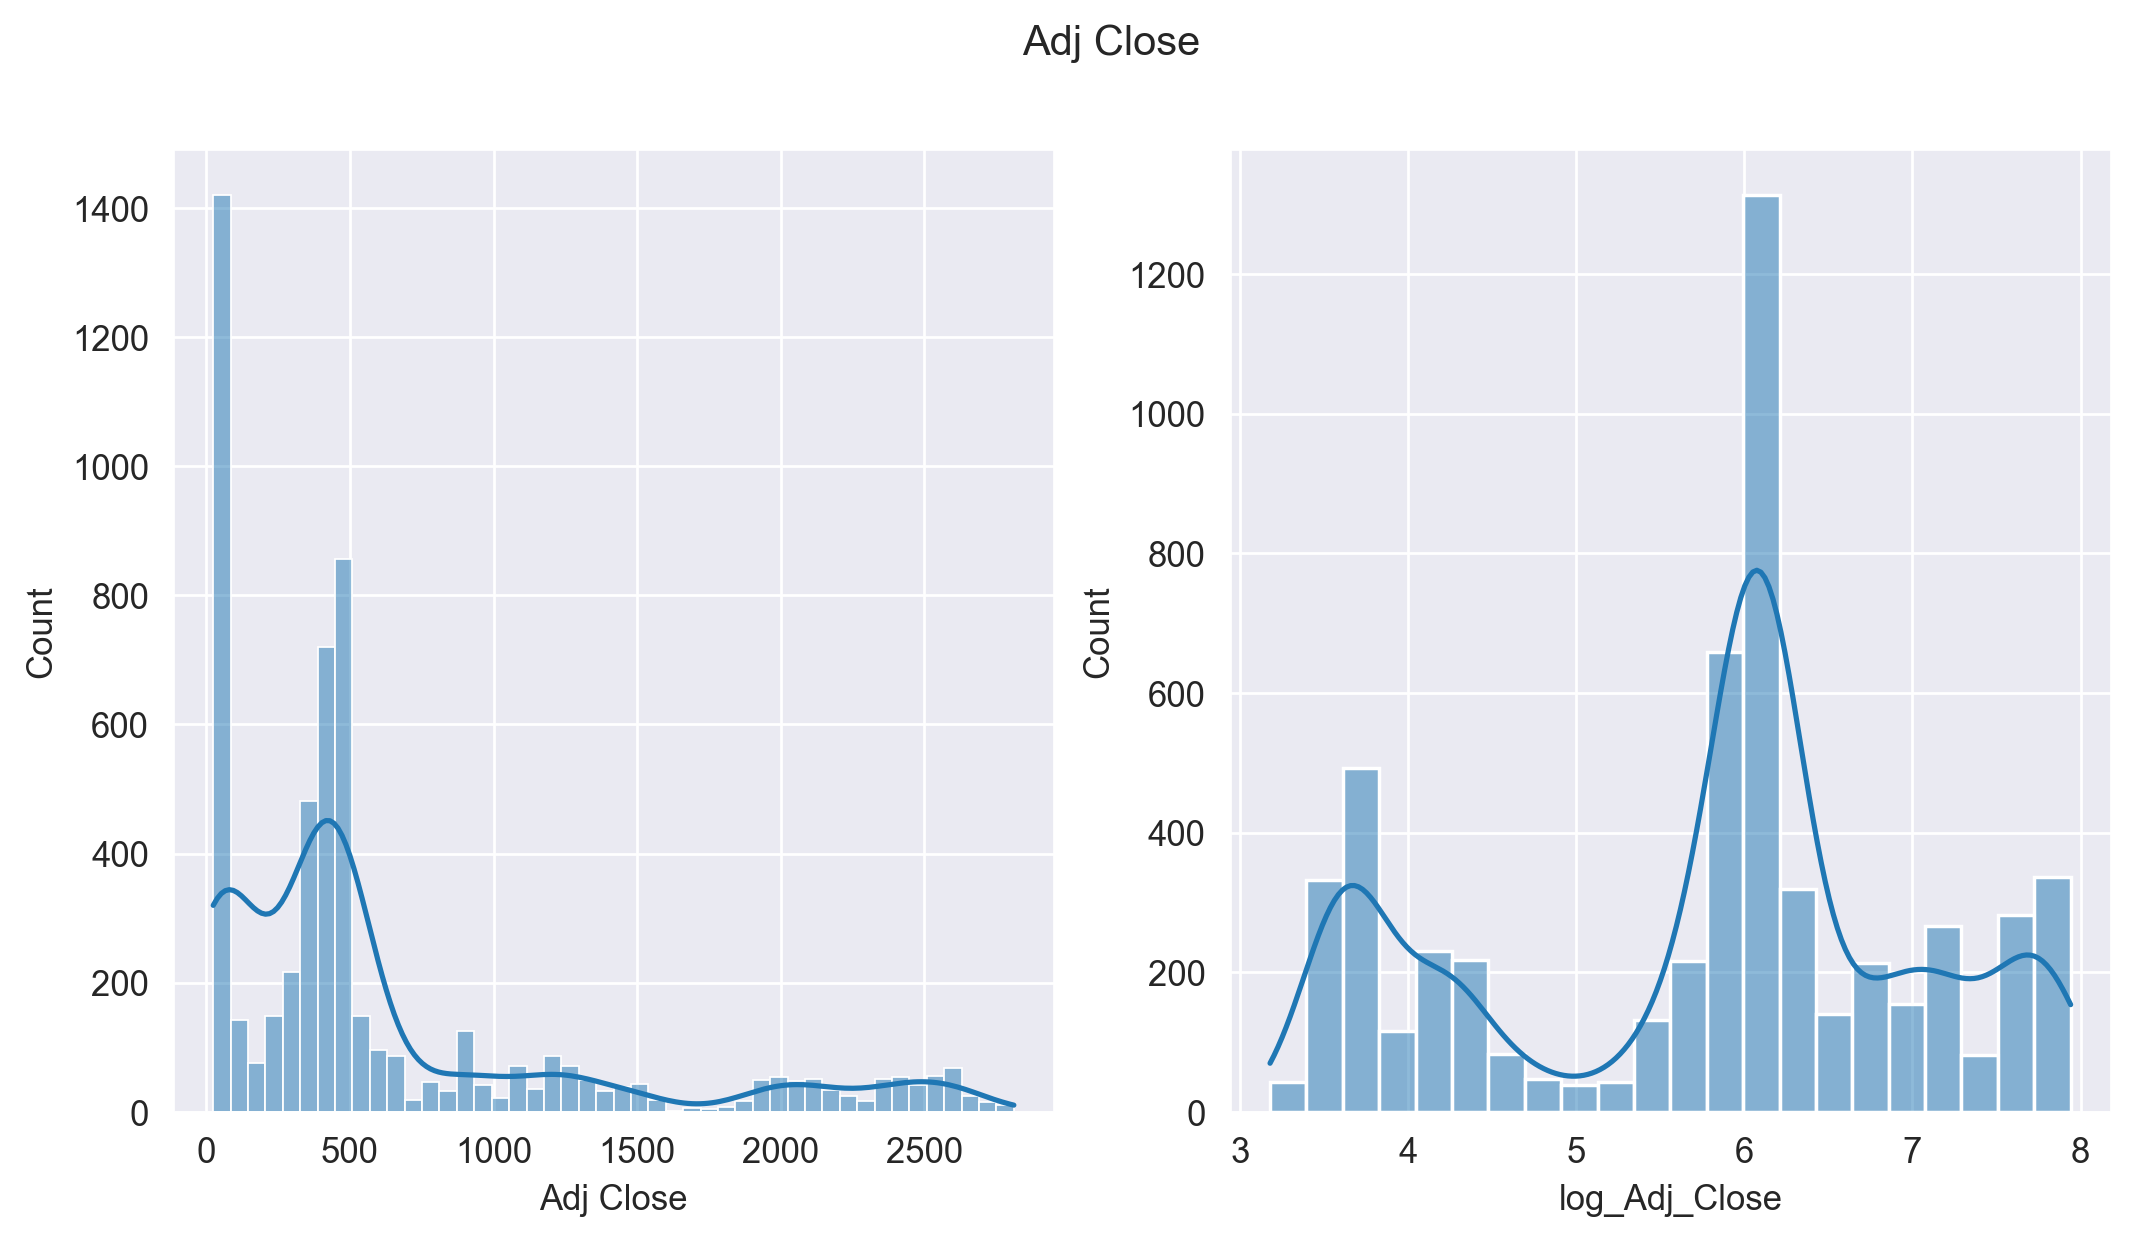

In [29]:
#Distribution of data before and after log transformation.

plt.suptitle('Adj Close')
plt.subplot(121)
sns.histplot(data['Adj Close'], kde=True)
plt.subplot(122)
sns.histplot(data['log_Adj_Close'], kde=True);

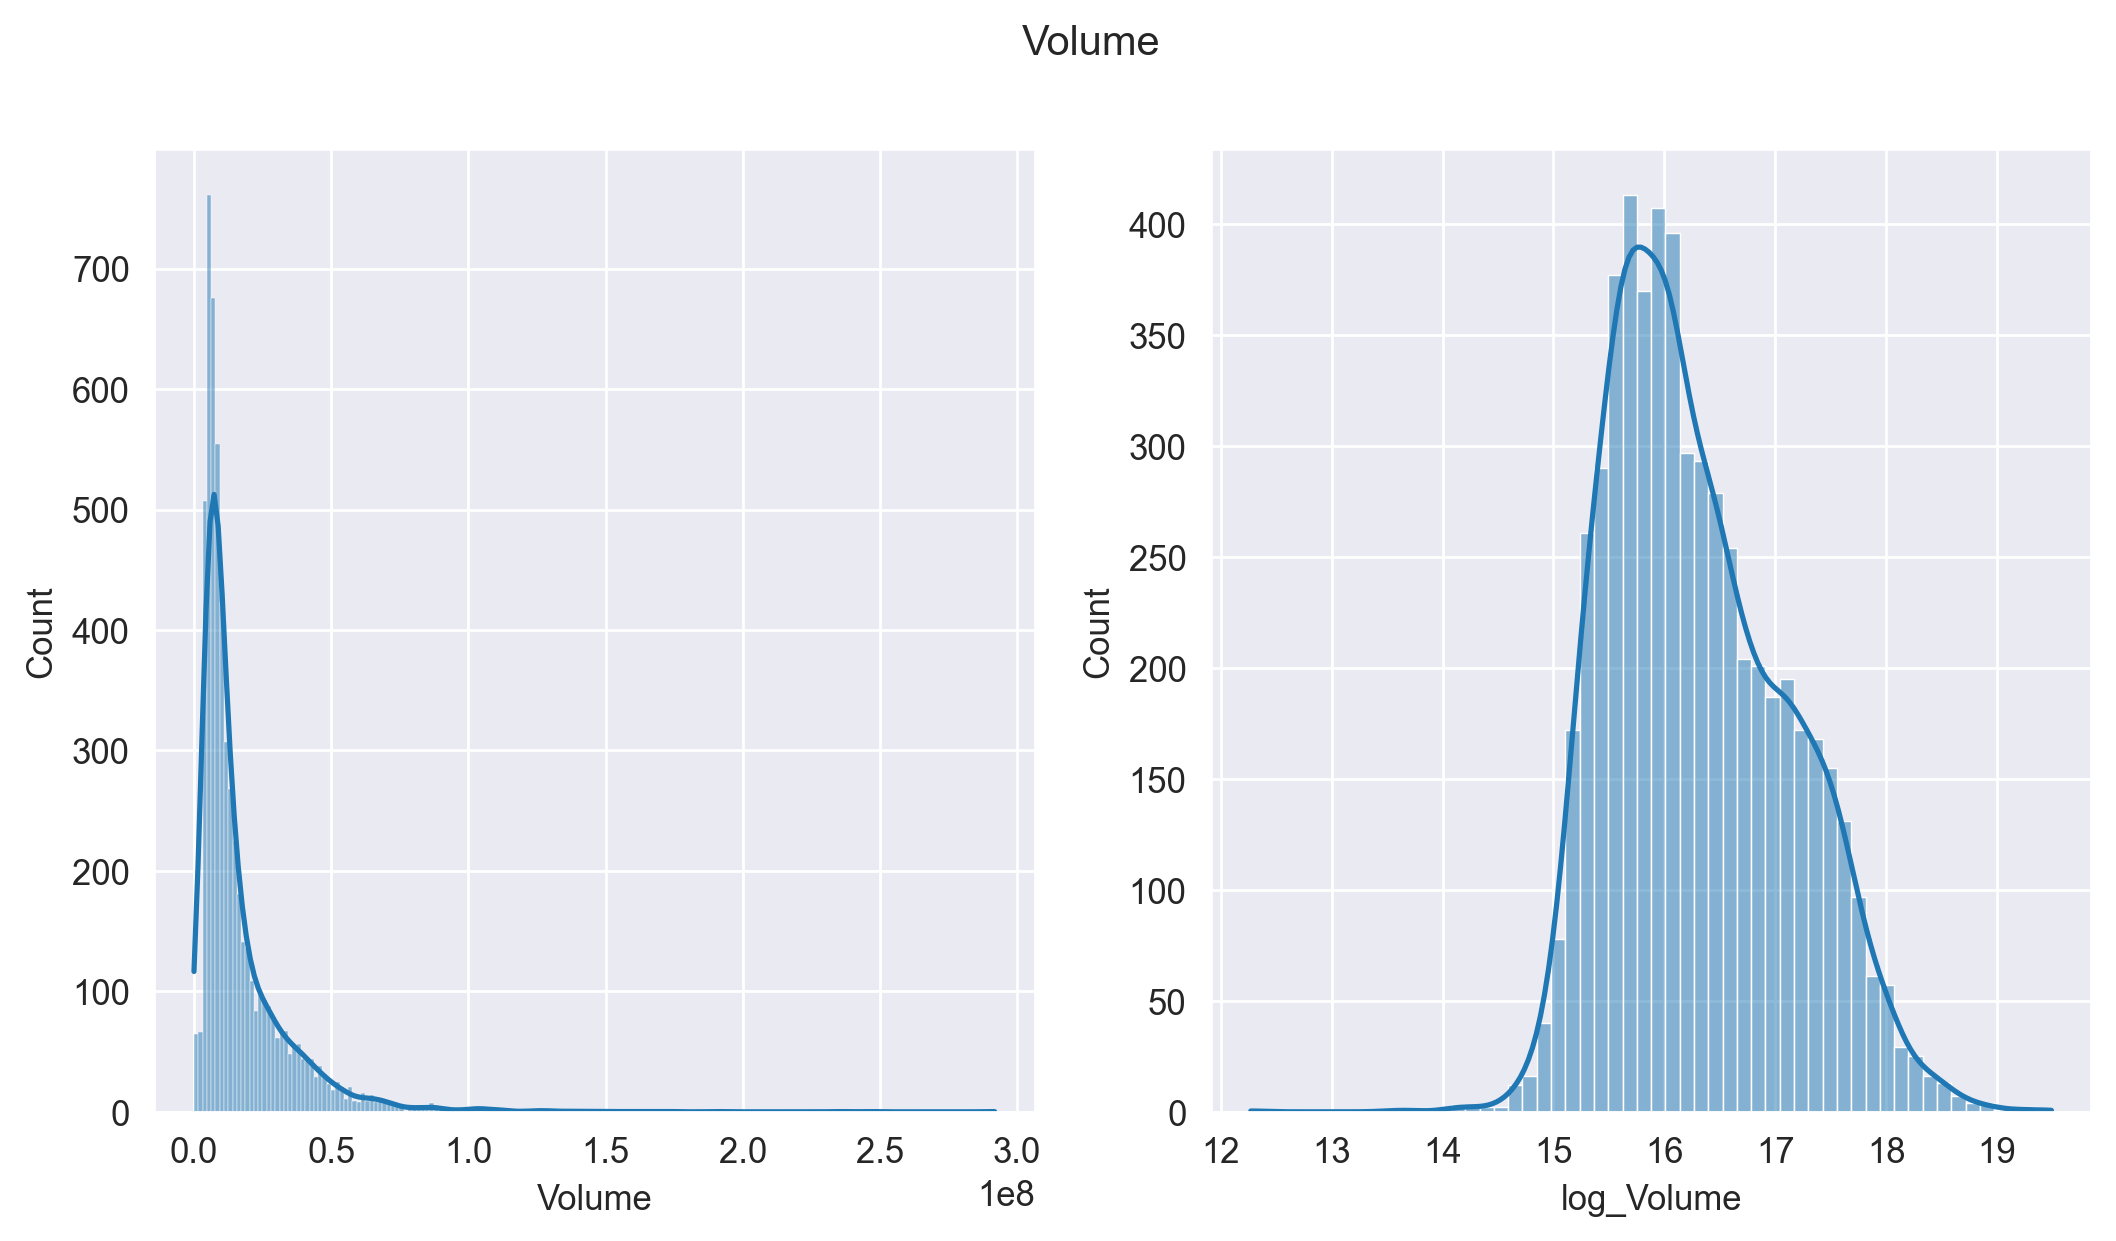

In [30]:
#Distribution of data before and after log transformation.

plt.suptitle('Volume')
plt.subplot(121)
sns.histplot(data['Volume'], kde=True)
plt.subplot(122)
sns.histplot(data['log_Volume'], kde=True);

#### Checking Trend and Seasonality for 'Adj Close'

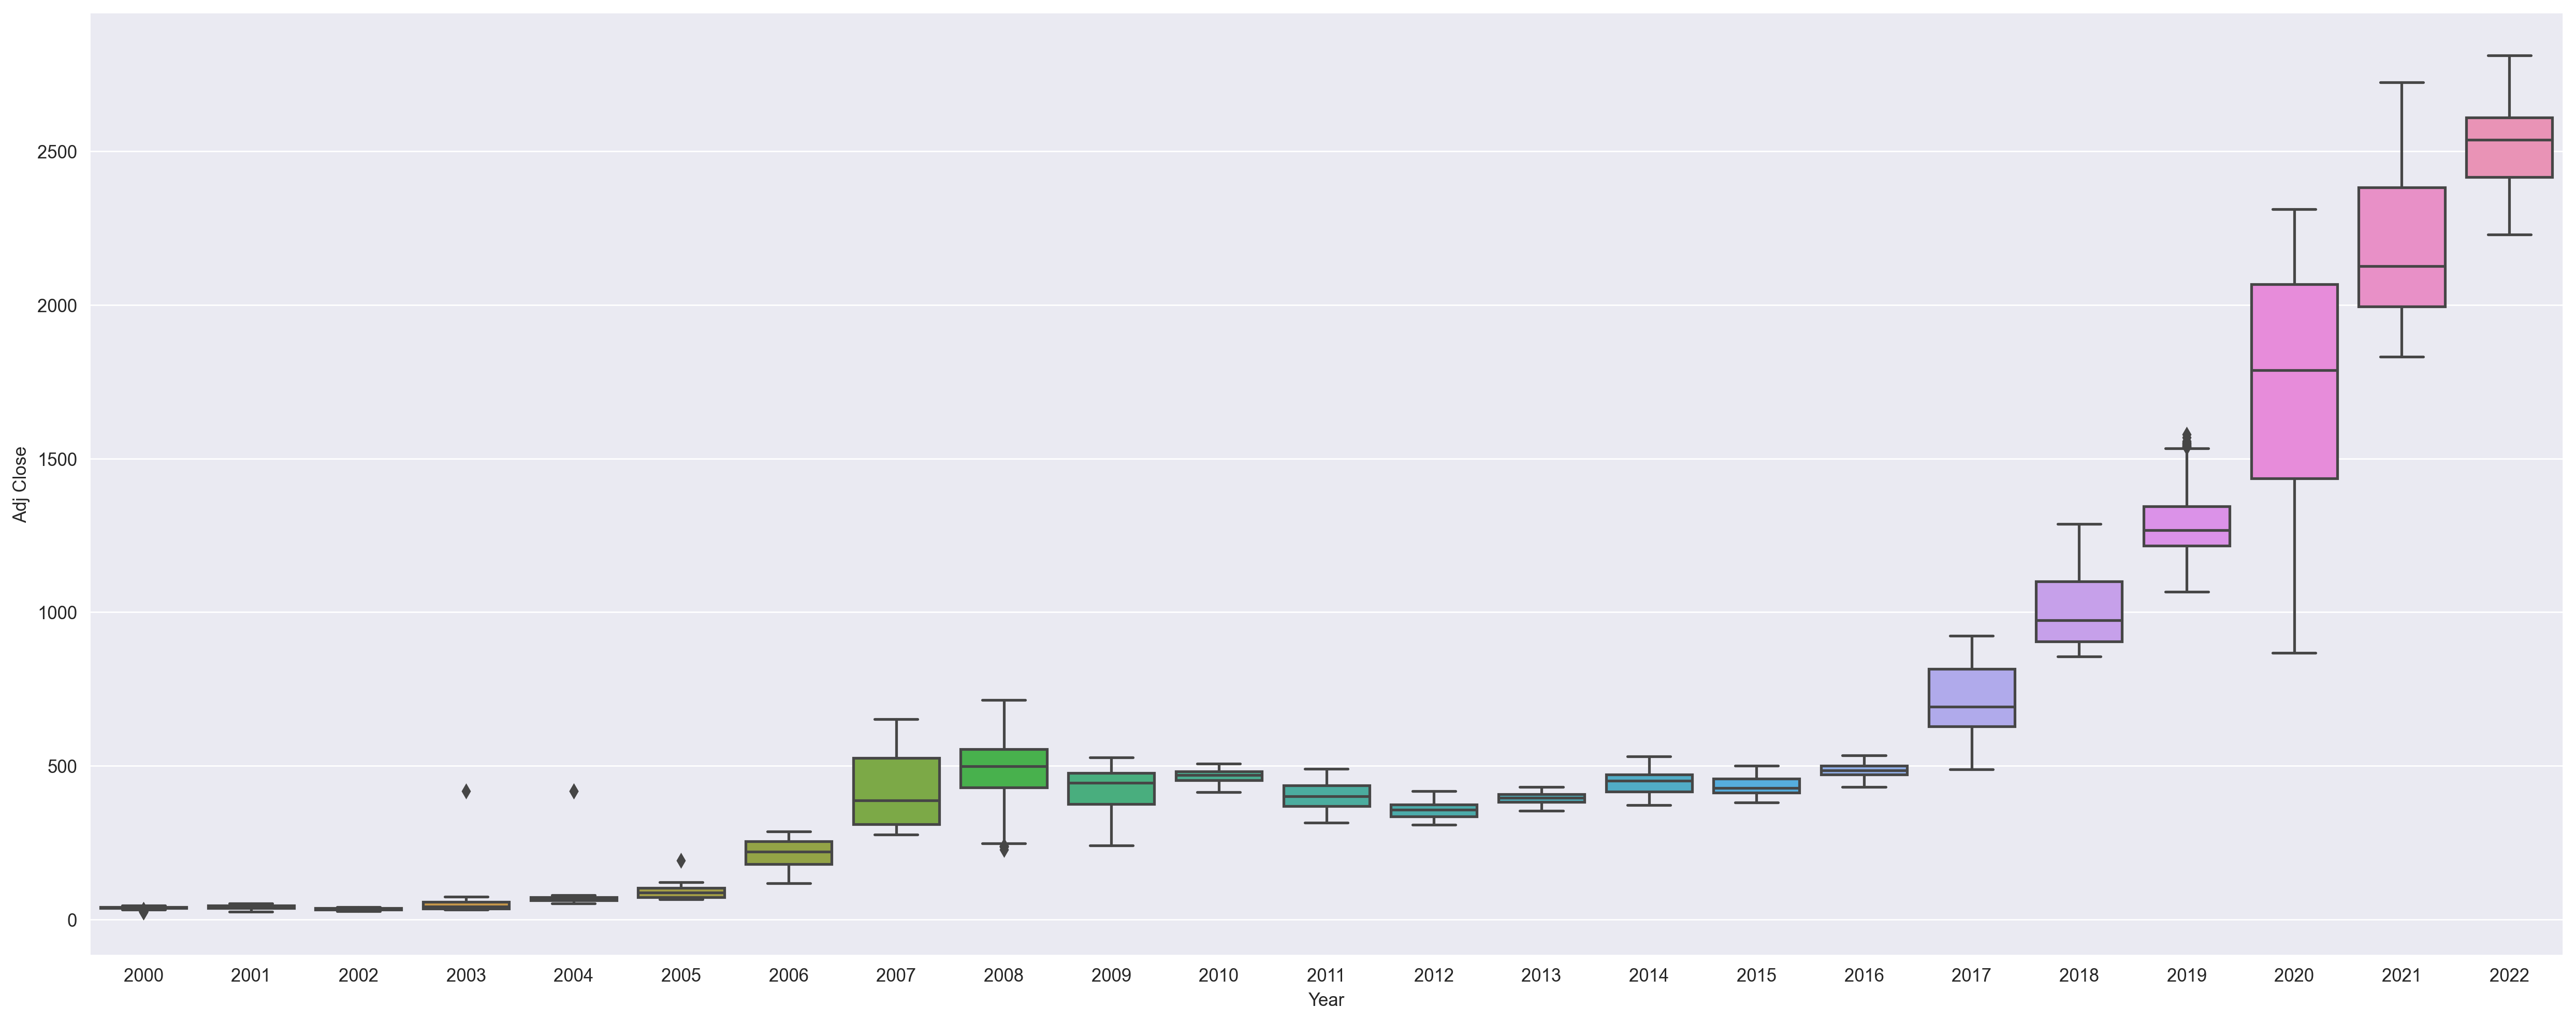

In [31]:
#Checking trend and seasonality with boxplot.

plt.figure(figsize=(20,8))
sns.boxplot(x='Year', y='Adj Close', data=data);
plt.tight_layout()

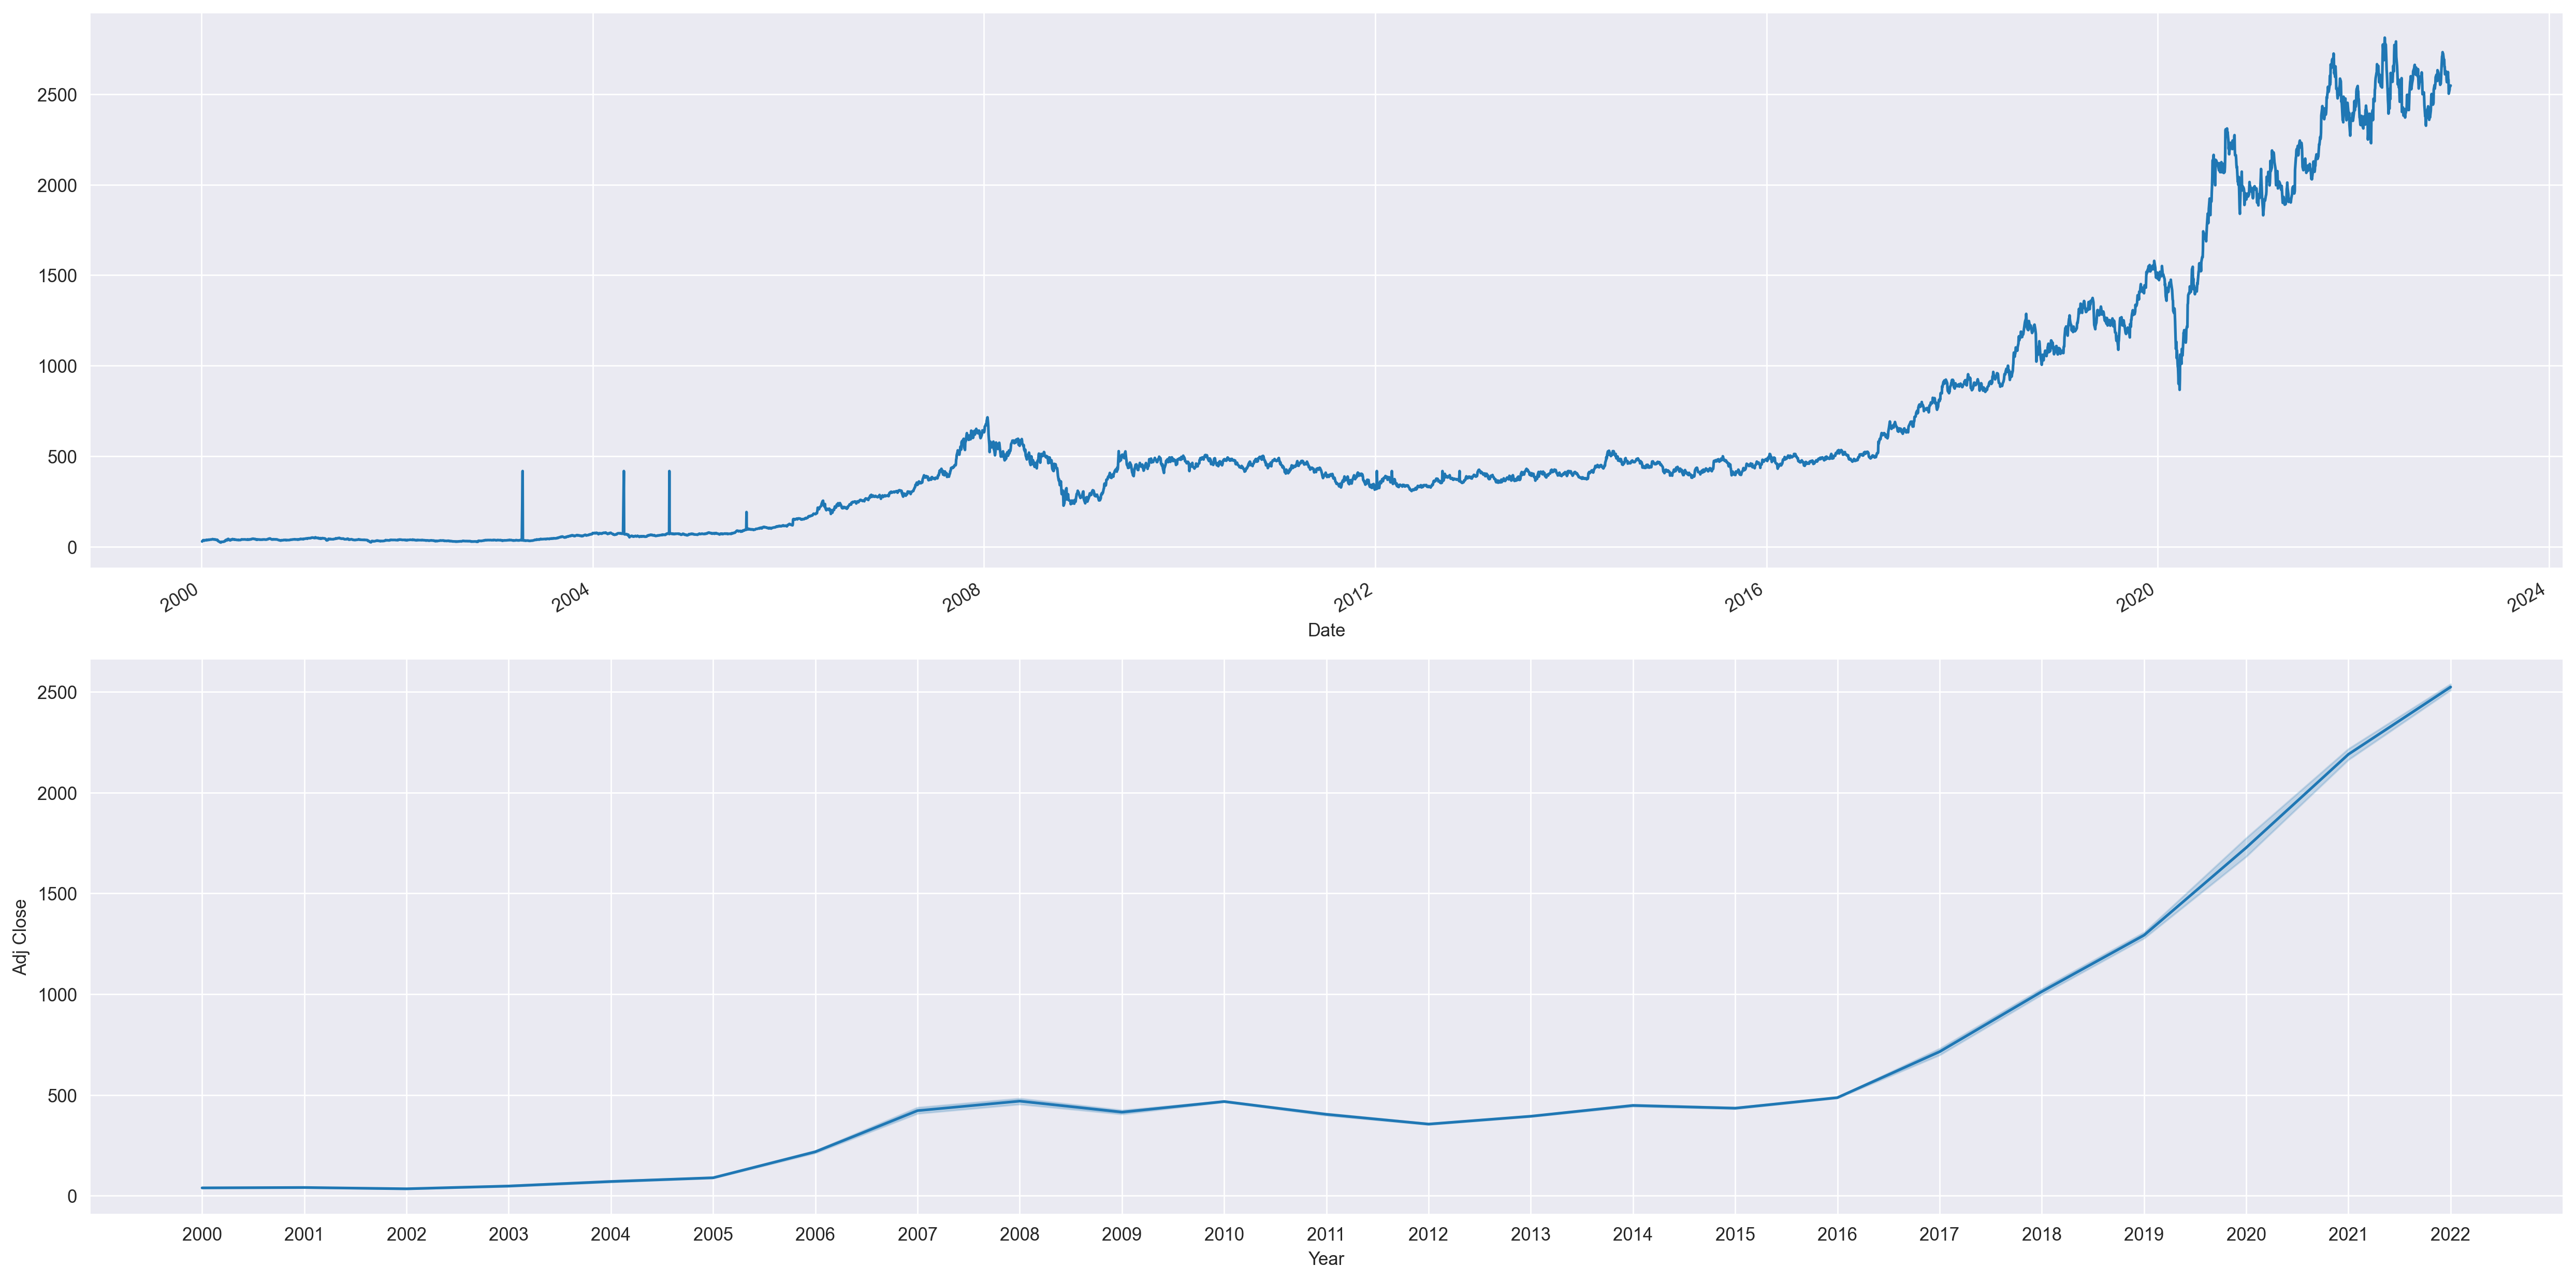

In [32]:
#Checking trend and seasonality with lineplot.

plt.figure(figsize=(20,10), dpi=250)
plt.subplot(211)
data['Adj Close'].plot()
plt.subplot(212)
sns.lineplot(x='Year', y='Adj Close', data=data)
plt.tight_layout()

<Figure size 5000x2500 with 0 Axes>

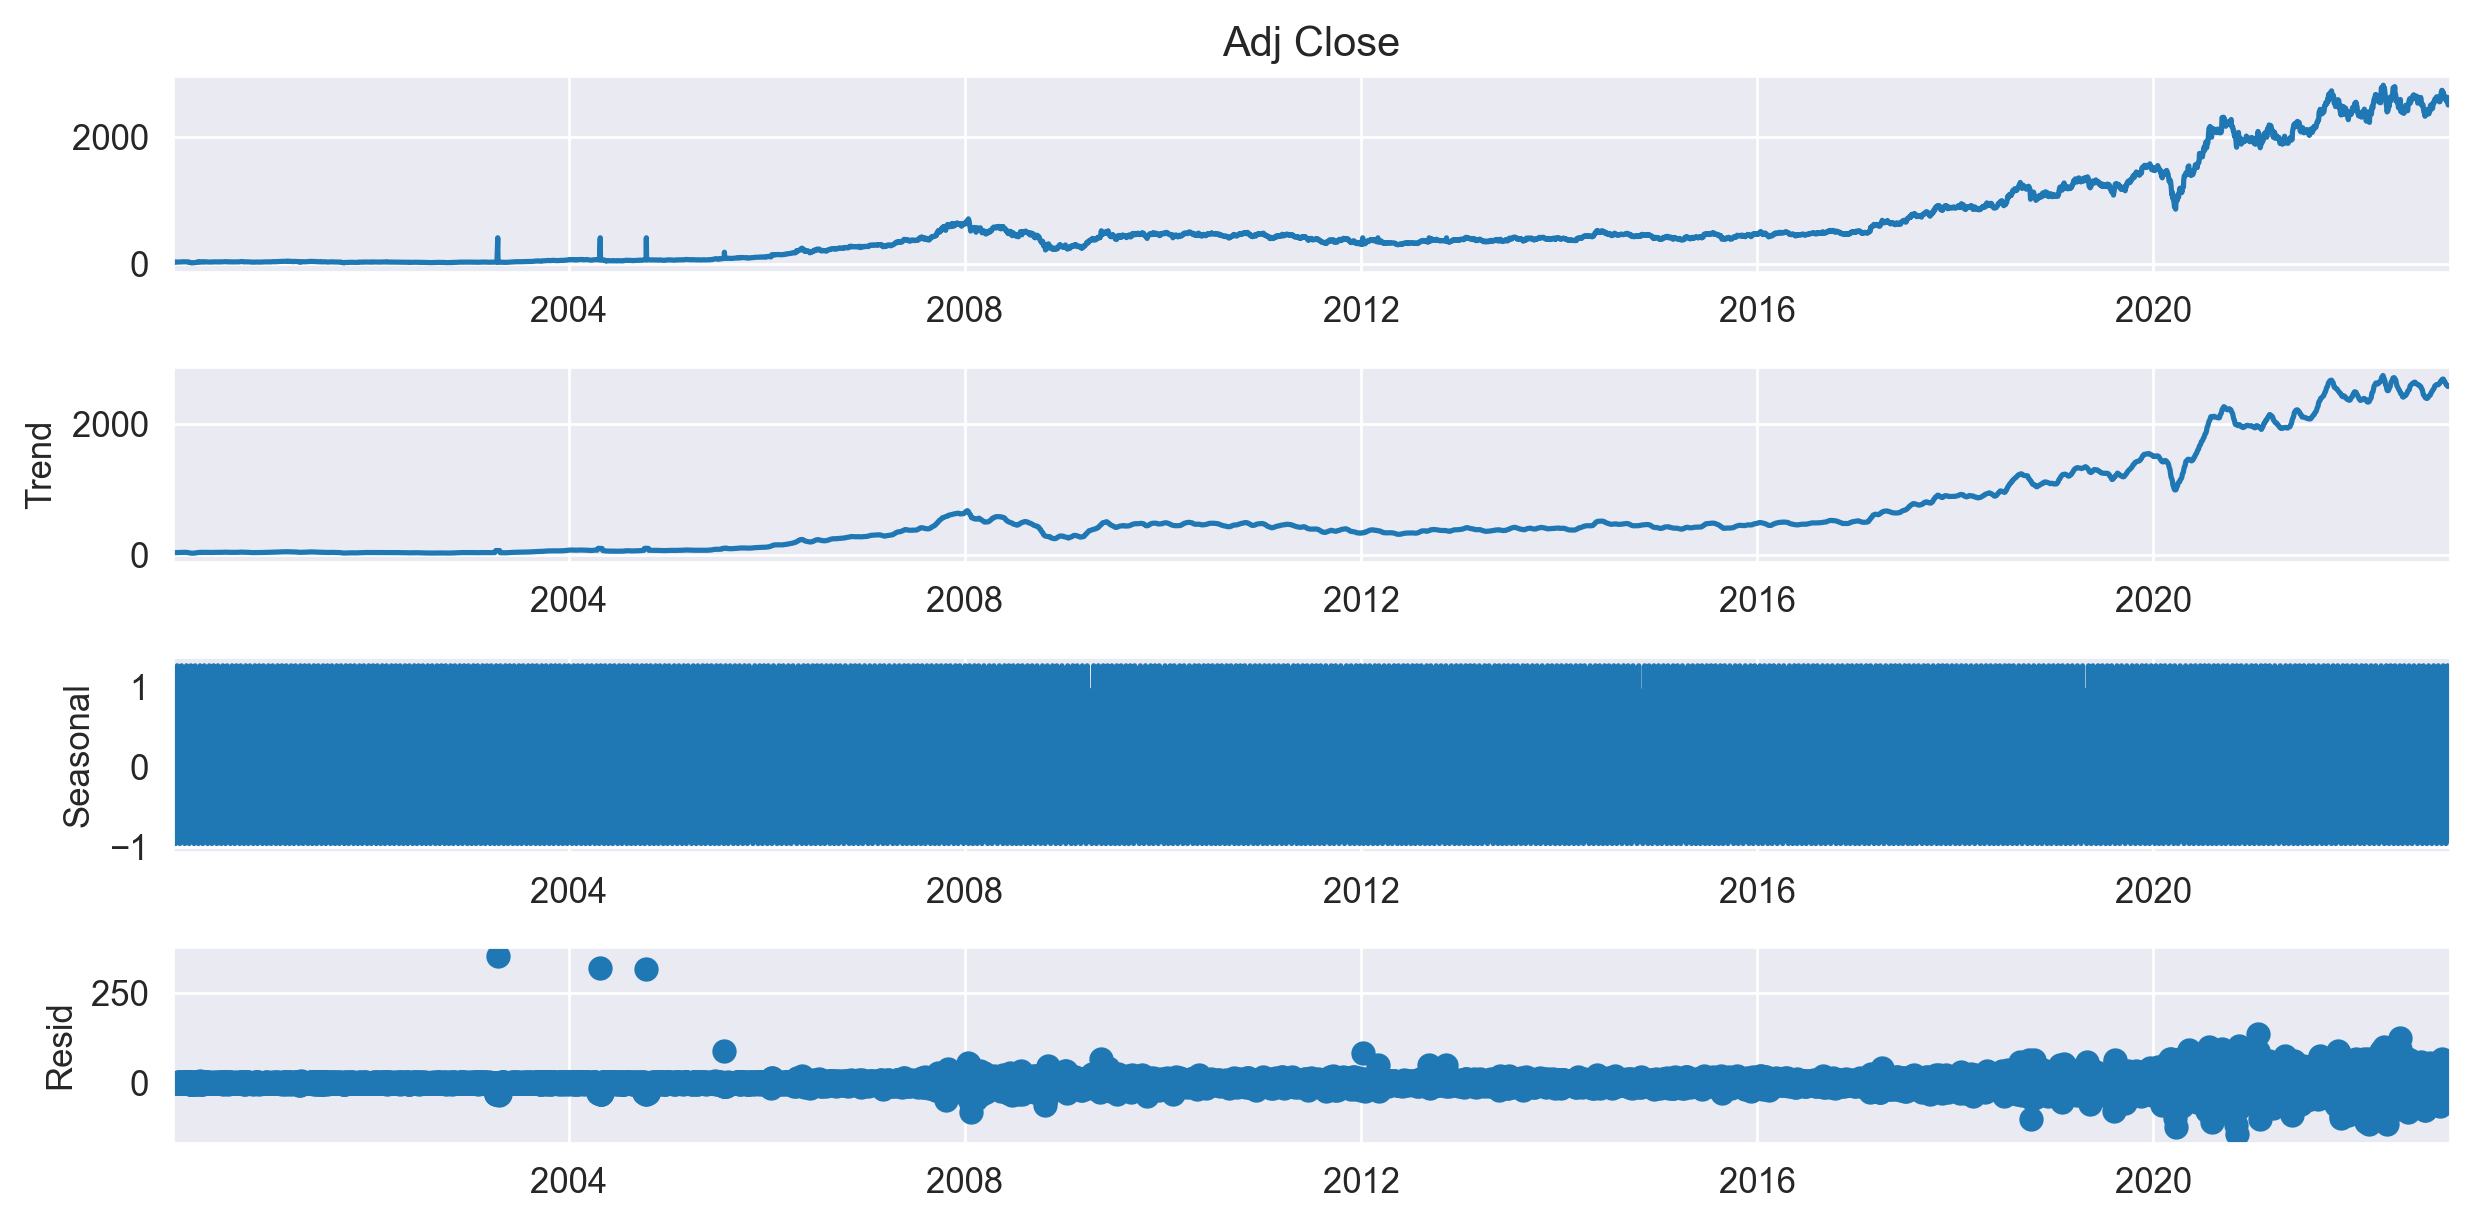

In [33]:
#Time Series Decomposition plot

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(20,10), dpi=250);
decompose_ts_add = seasonal_decompose(data['Adj Close'], period=12)
decompose_ts_add.plot();

- Exponential trend and no seasonality
- Data is non stationary

#### Checking Trend and Seasonality for 'Volume'

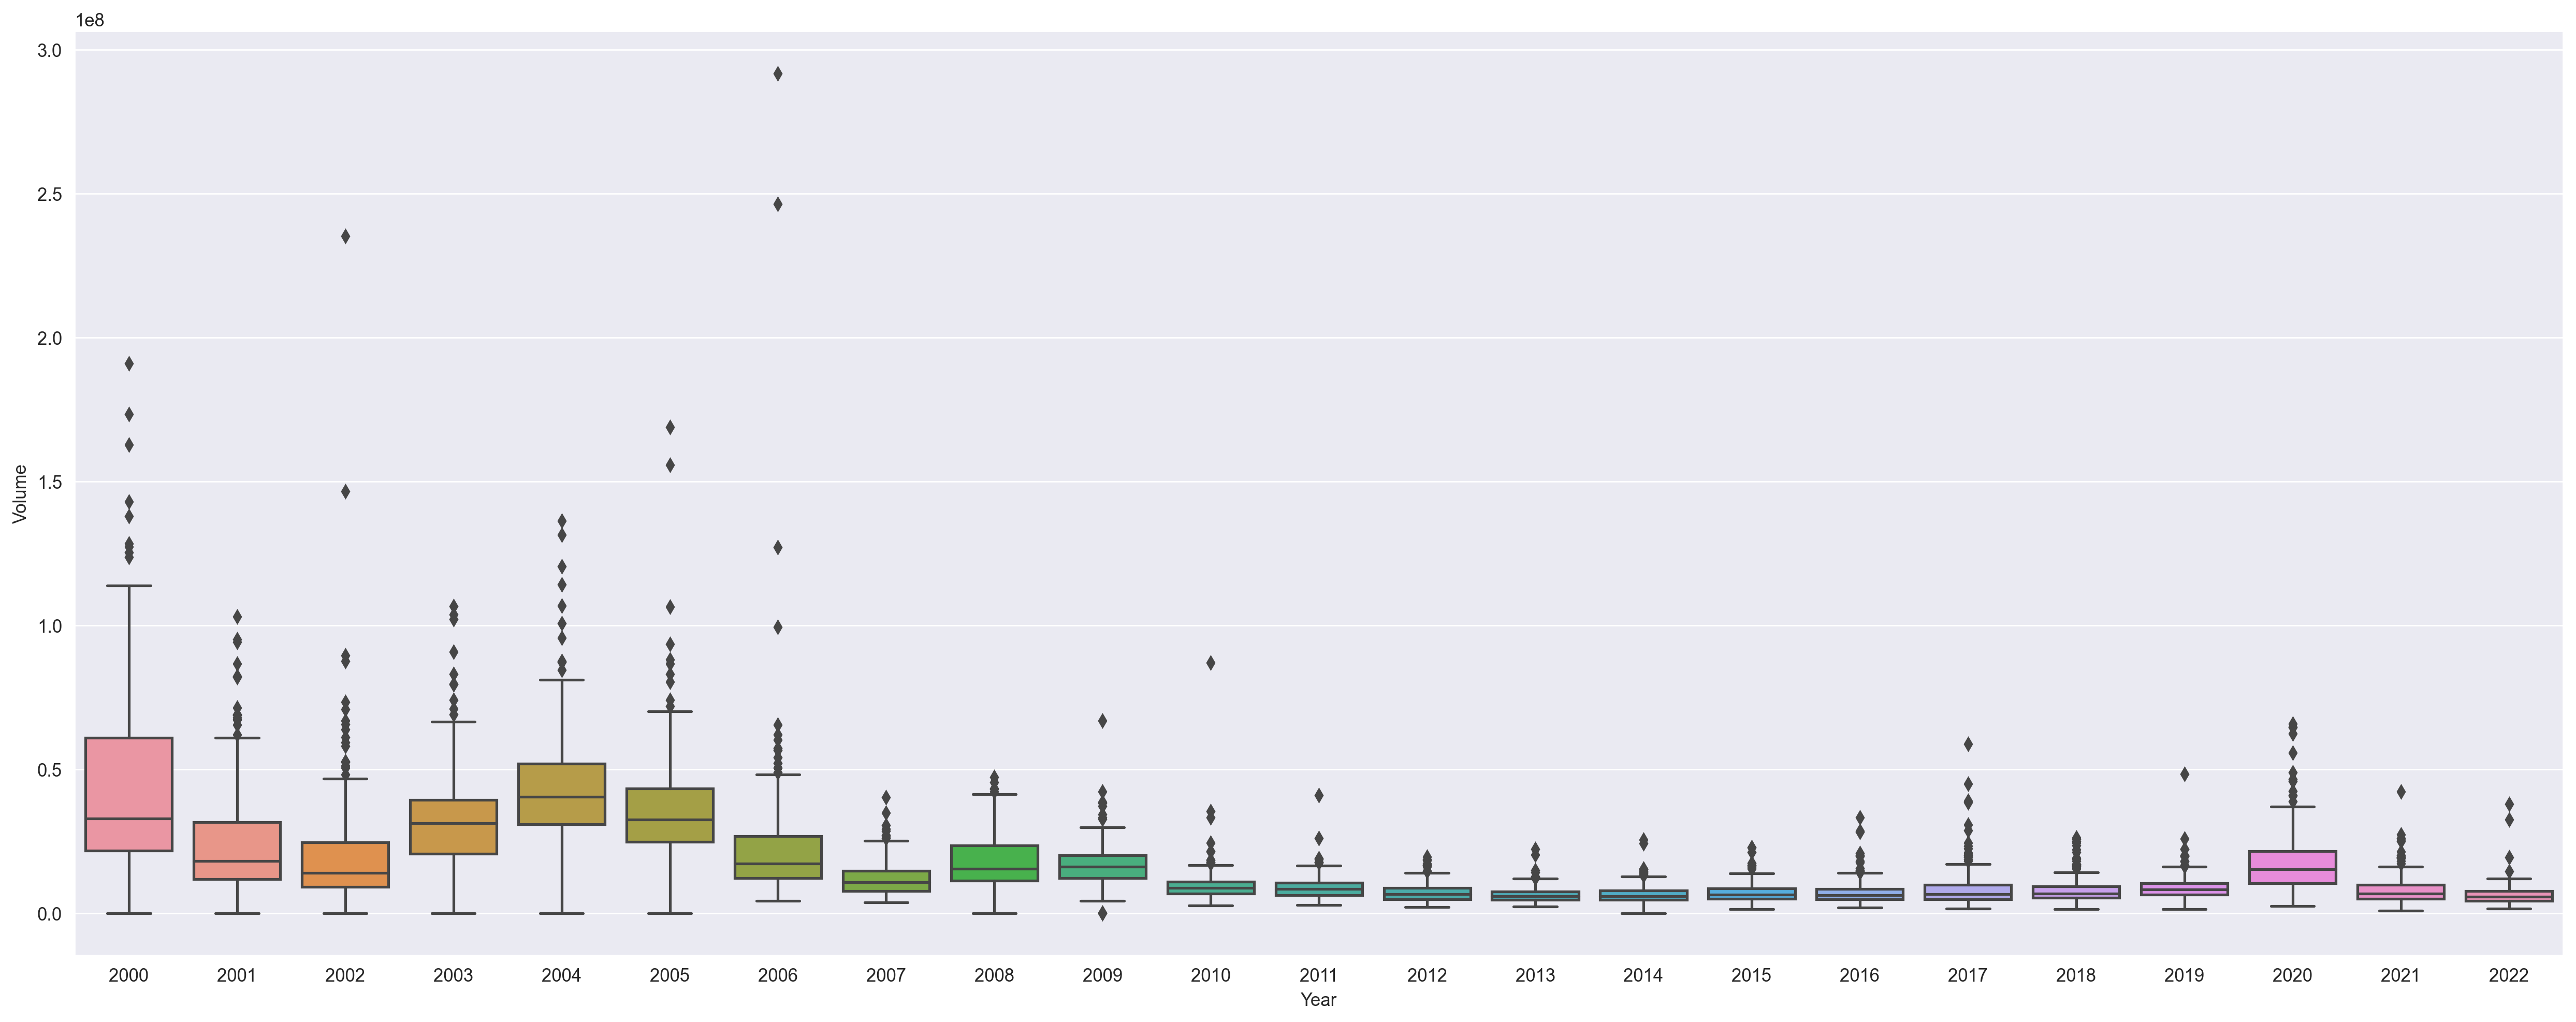

In [34]:
#Checking trend and seasonality with boxplot.

plt.figure(figsize=(20,8), dpi=250)
sns.boxplot(x='Year', y='Volume', data=data);
plt.tight_layout()

<AxesSubplot:xlabel='Date'>

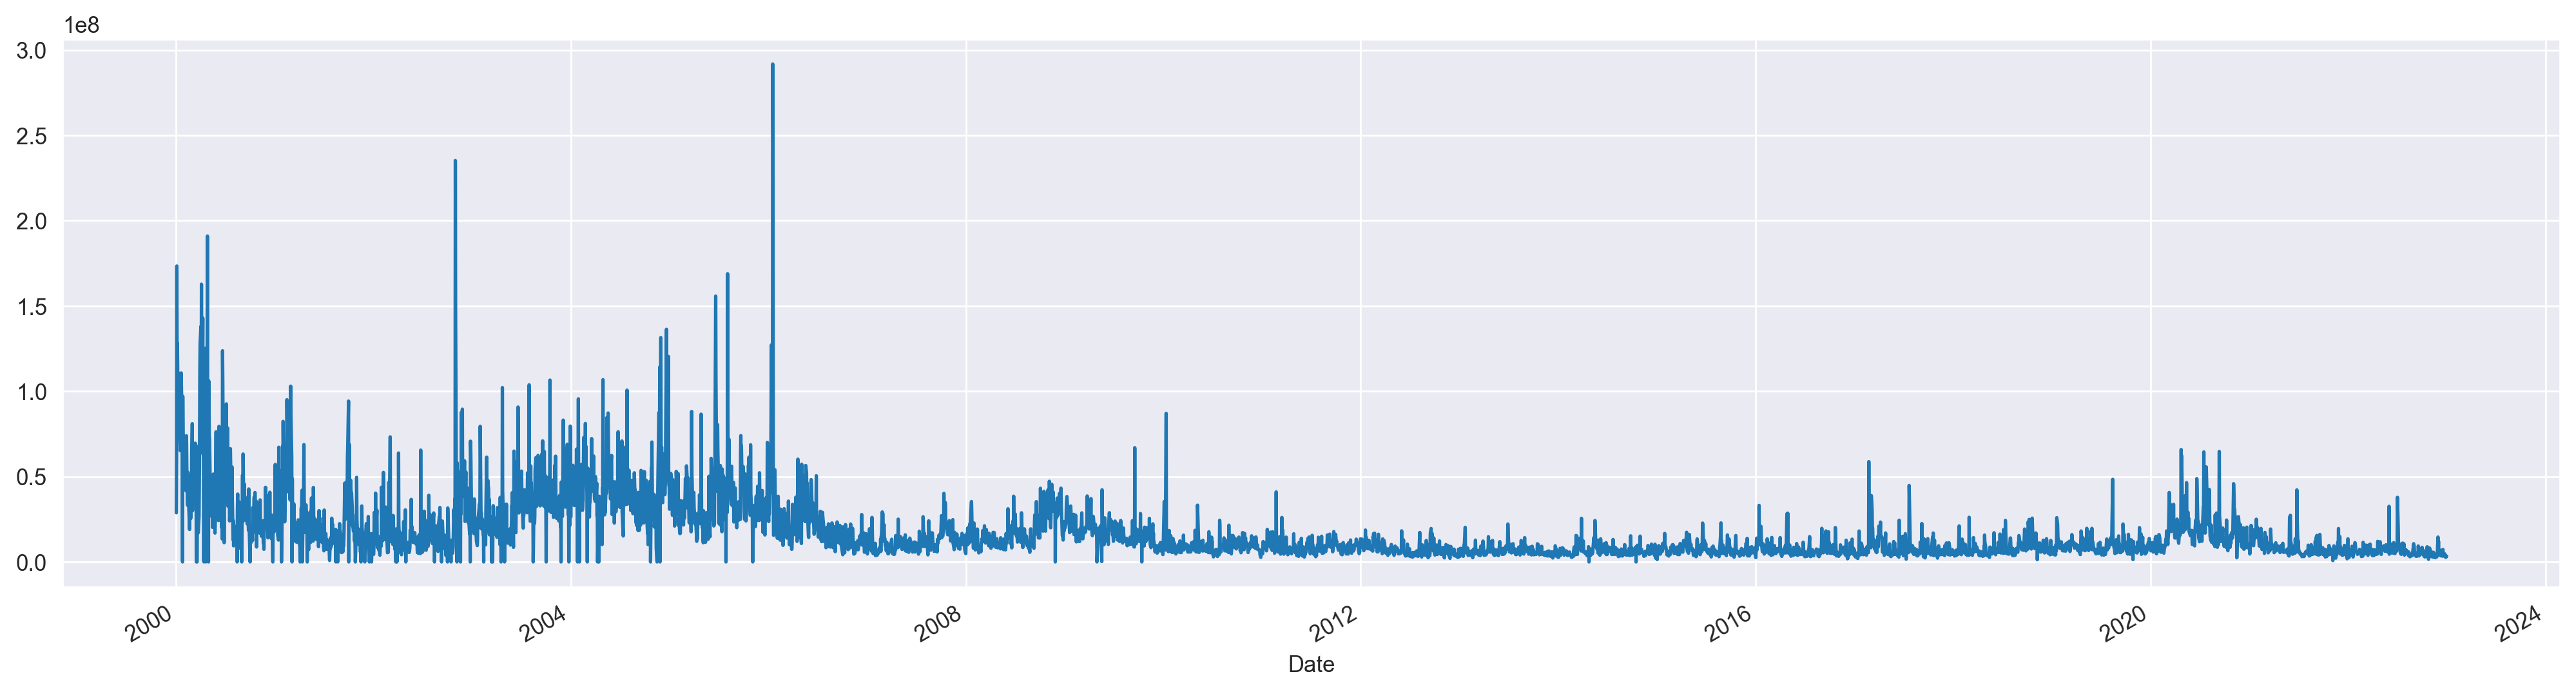

In [35]:
#Checking trend and seasonality with lineplot.

plt.figure(figsize=(20,5))
data['Volume'].plot()

<Figure size 5000x2500 with 0 Axes>

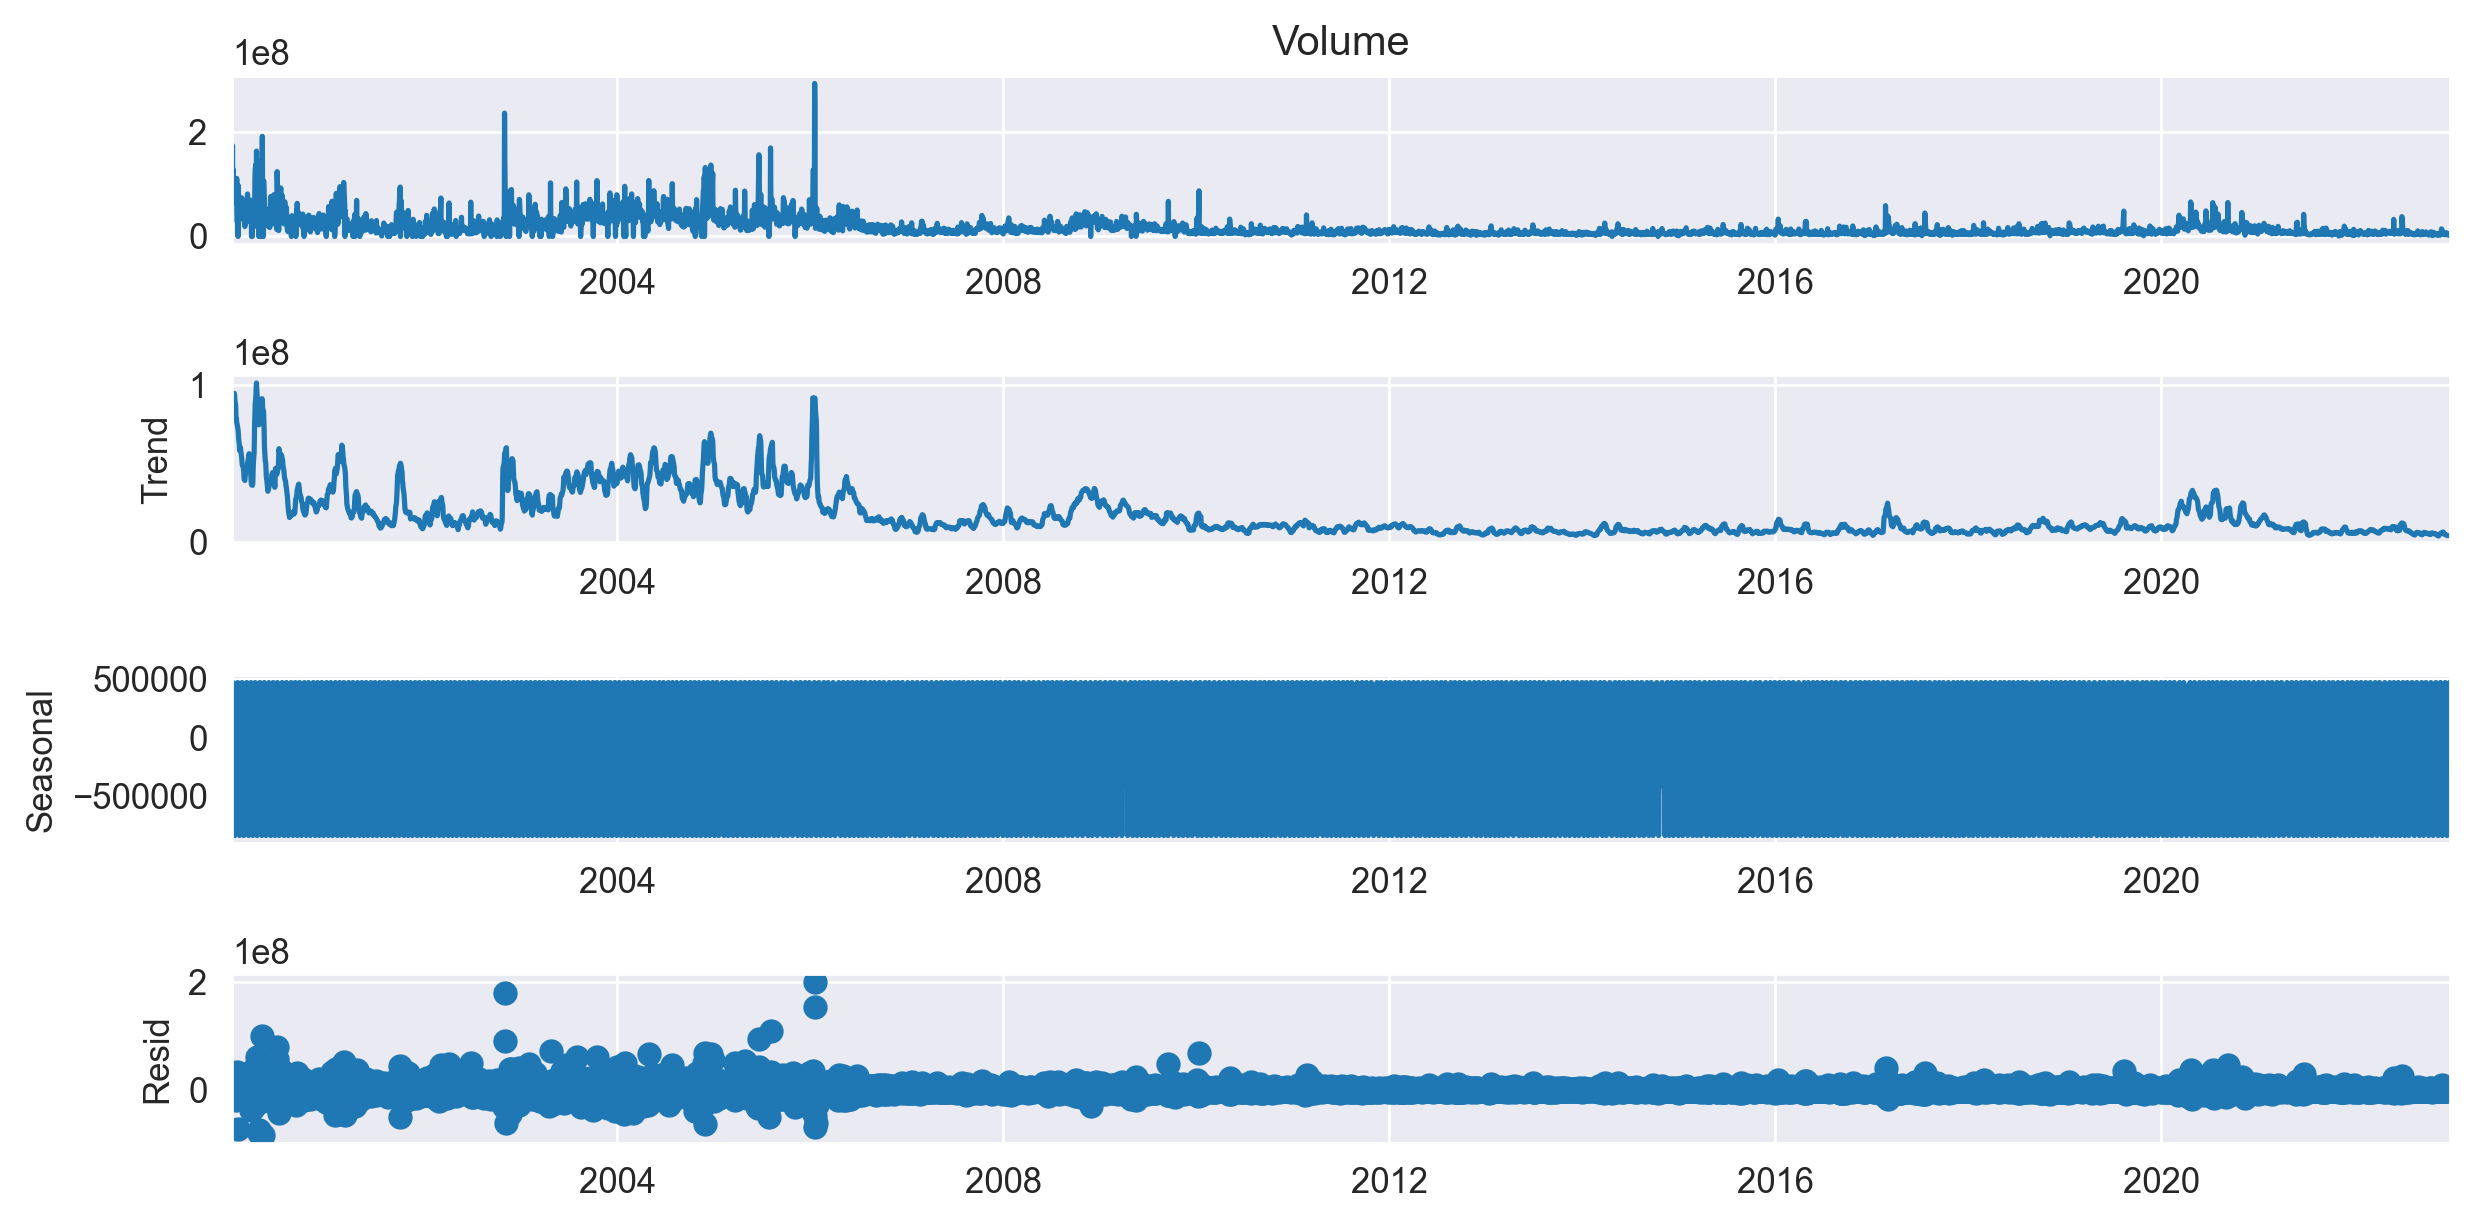

In [36]:
#Time Series Decomposition Plot.

plt.figure(figsize=(20,10), dpi=250);
decompose_ts_add = seasonal_decompose(data['Volume'], period=12)
decompose_ts_add.plot();

- Constant trend and no seasonality
- Data is stationary

###### First Order Differencing.

In [37]:
#Calculating First order differencing for 'Adj Close'.

data['First_order'] = data['Adj Close'].diff(periods=1)
data

,Adj Close,Volume,Month,Year,log_Adj_Close,log_Volume,First_order
Date,,,,,,,
2000-01-03,29.68,28802010.0,Jan,2000,3.390473,17.175956,NaN
2000-01-04,32.06,61320457.0,Jan,2000,3.467609,17.931624,2.38
2000-01-05,33.32,173426953.0,Jan,2000,3.506158,18.971267,1.26
2000-01-06,34.71,101355113.0,Jan,2000,3.547028,18.434141,1.39
2000-01-07,37.10,128426756.0,Jan,2000,3.613617,18.670869,2.39
...,...,...,...,...,...,...,...
2022-12-26,2524.05,2764496.0,Dec,2022,7.833620,14.832369,21.85
2022-12-27,2544.70,2659749.0,Dec,2022,7.841768,14.793742,20.65
2022-12-28,2544.45,3442509.0,Dec,2022,7.841670,15.051711,-0.25


In [38]:
data.dropna(inplace=True)
data

,Adj Close,Volume,Month,Year,log_Adj_Close,log_Volume,First_order
Date,,,,,,,
2000-01-04,32.06,61320457.0,Jan,2000,3.467609,17.931624,2.38
2000-01-05,33.32,173426953.0,Jan,2000,3.506158,18.971267,1.26
2000-01-06,34.71,101355113.0,Jan,2000,3.547028,18.434141,1.39
2000-01-07,37.10,128426756.0,Jan,2000,3.613617,18.670869,2.39
2000-01-10,36.38,86714866.0,Jan,2000,3.594019,18.278136,-0.72
...,...,...,...,...,...,...,...
2022-12-26,2524.05,2764496.0,Dec,2022,7.833620,14.832369,21.85
2022-12-27,2544.70,2659749.0,Dec,2022,7.841768,14.793742,20.65
2022-12-28,2544.45,3442509.0,Dec,2022,7.841670,15.051711,-0.25


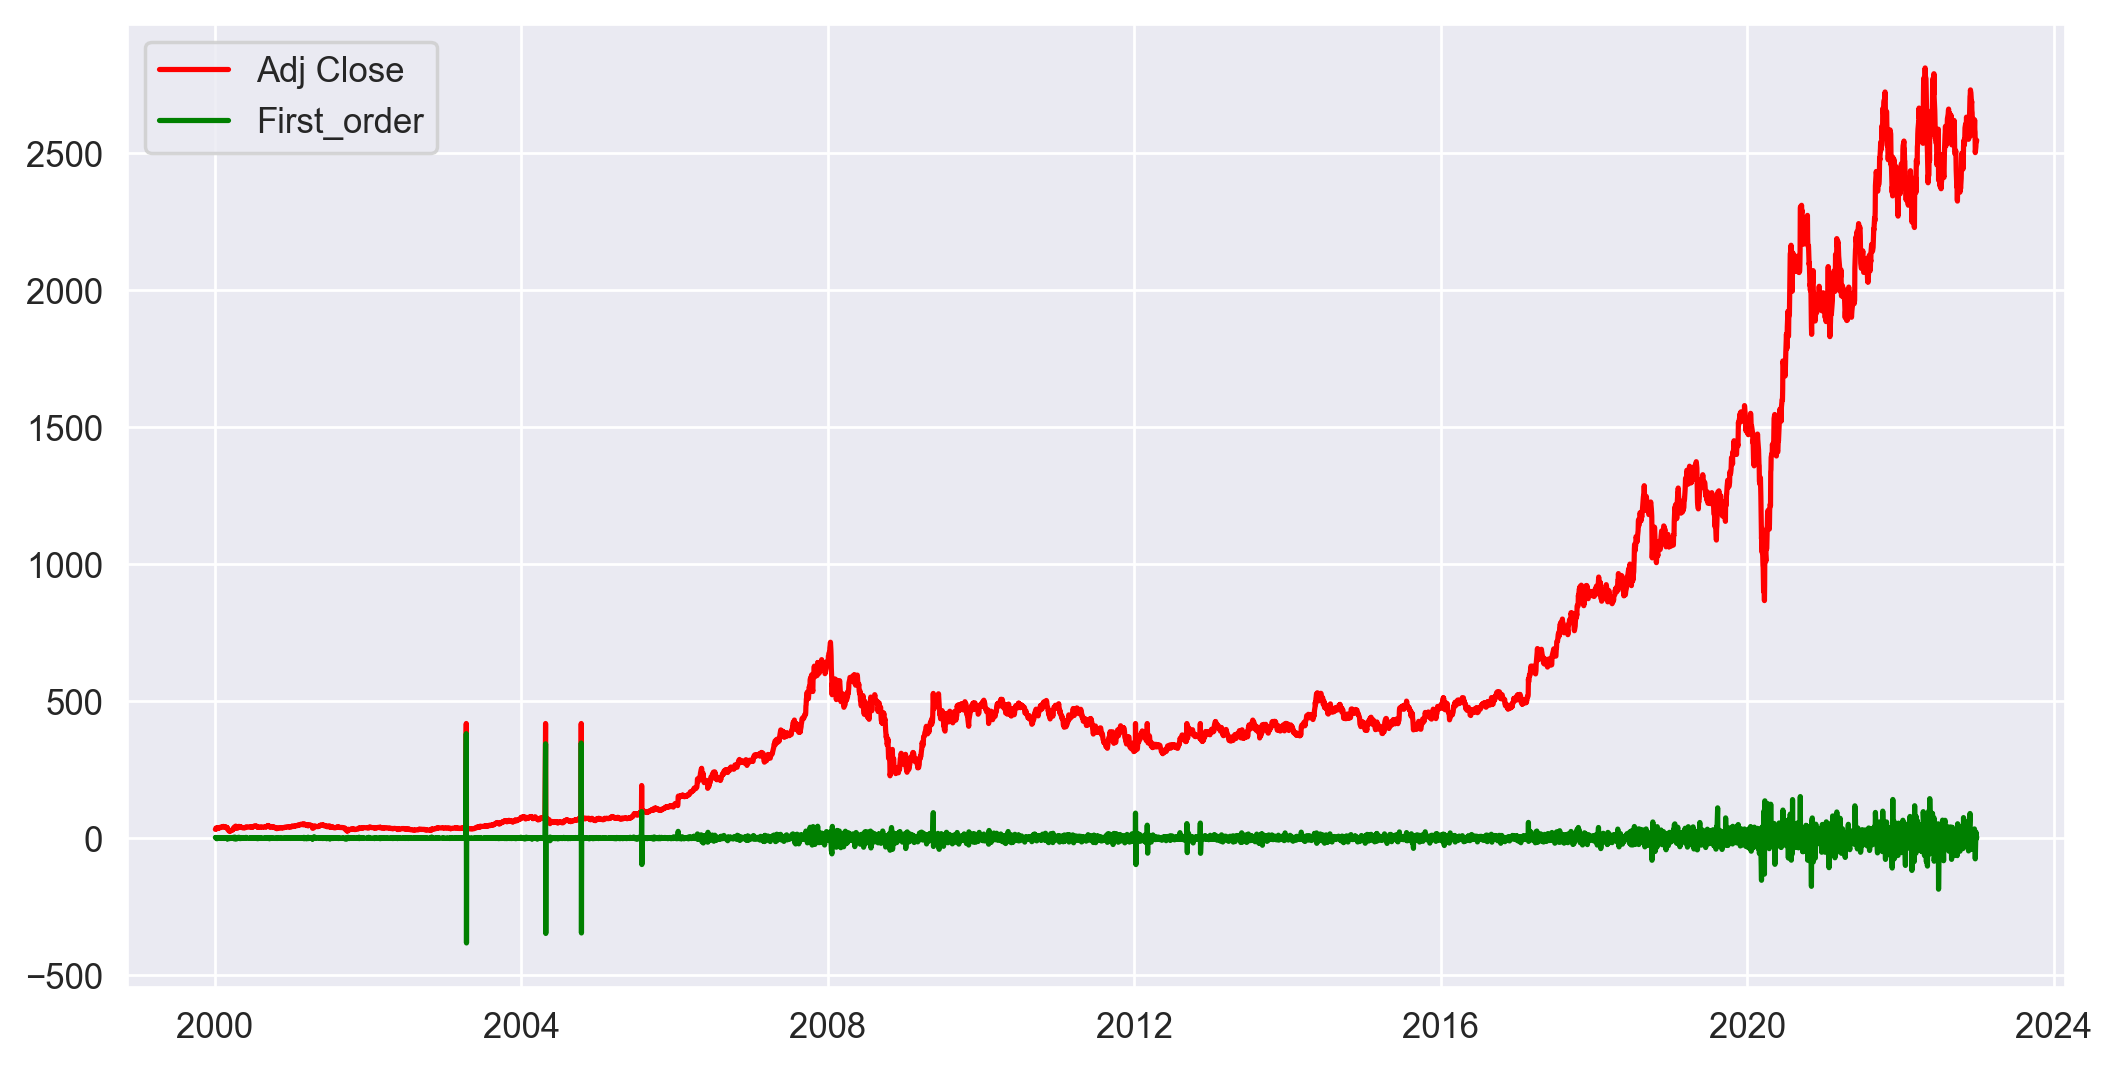

In [39]:
plt.plot(data['Adj Close'], color='red', label='Adj Close')
plt.plot(data['First_order'], color='green', label='First_order')
plt.legend();

In [40]:
#Autocorrelation
acf_values = acf(data['First_order'])
acf_values

array([ 1.        , -0.15238218,  0.0114684 , -0.03161673, -0.02263116,
        0.01248586,  0.00306912, -0.00463204, -0.00644109,  0.00536469,
        0.0163069 , -0.01854341,  0.00739364, -0.0060772 ,  0.02941739,
       -0.0095686 ,  0.01084263,  0.00510202, -0.0402883 ,  0.01143726,
       -0.00649546, -0.01592919,  0.01734036,  0.00540073, -0.01279192,
       -0.00533751,  0.01137828,  0.02835424, -0.02476454, -0.00928477,
       -0.040408  ,  0.02613258, -0.01463467,  0.00154855,  0.00939656,
       -0.01412368, -0.01963931, -0.03412998])

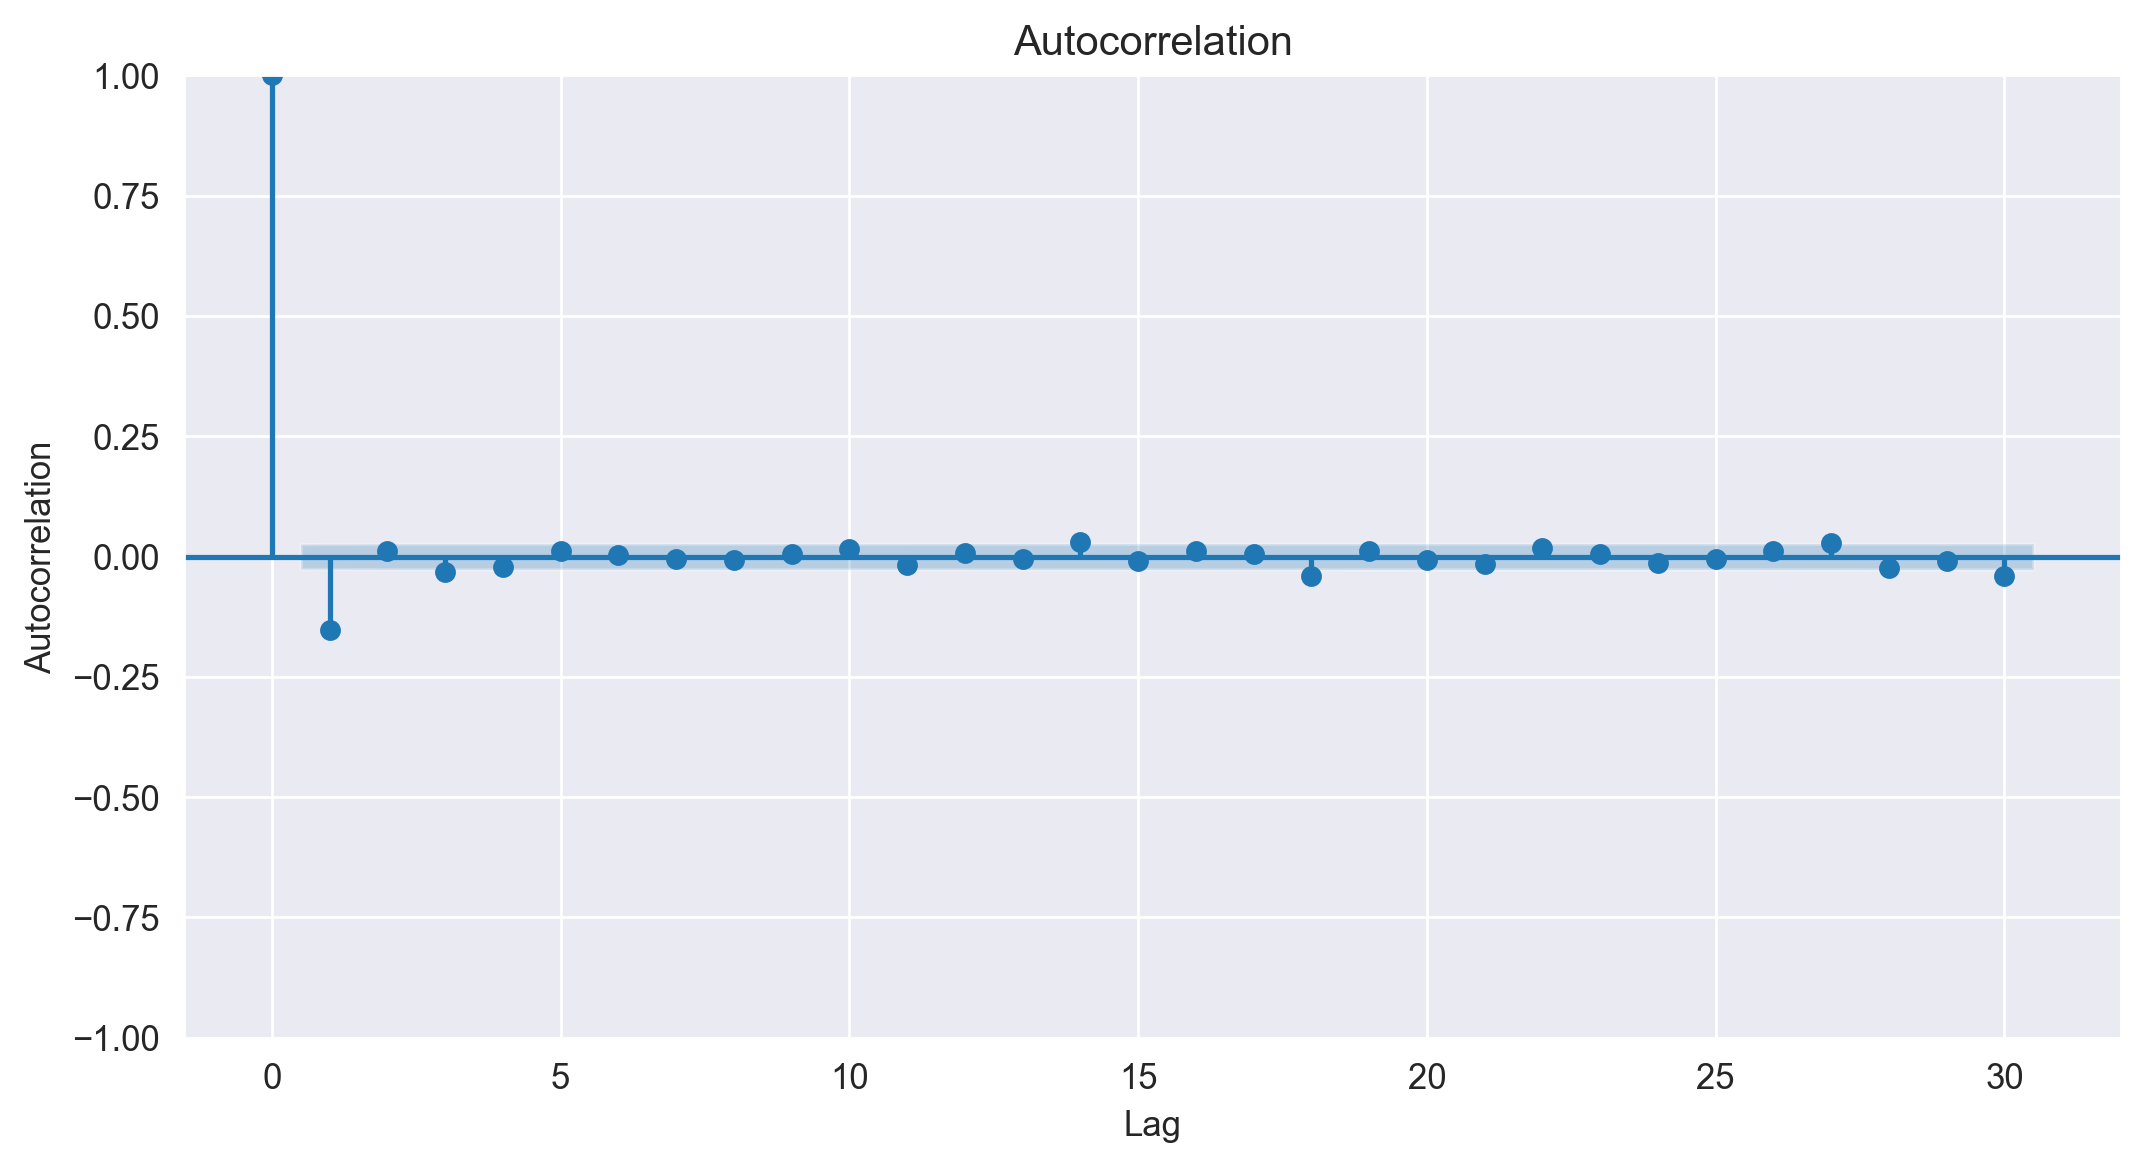

In [41]:
#plot acf

plot_acf(data['First_order'], lags=30);
plt.xlabel('Lag')
plt.ylabel('Autocorrelation');

In [42]:
#Calculating pacf

pacf_values = pacf(data['First_order'])
pacf_values

array([ 1.00000000e+00, -1.52408672e-01, -1.20355782e-02, -3.24565142e-02,
       -3.30971305e-02,  3.89957768e-03,  4.51688289e-03, -5.31402125e-03,
       -8.30991344e-03,  3.93256892e-03,  1.79576568e-02, -1.44873519e-02,
        2.57836204e-03, -3.18252815e-03,  2.85763459e-02, -1.78341460e-03,
        9.80210308e-03,  1.05619630e-02, -3.77136890e-02, -9.30242562e-04,
       -4.51525081e-03, -1.98475949e-02,  1.01526230e-02,  1.02807331e-02,
       -1.26539456e-02, -8.78043020e-03,  9.82978792e-03,  3.28630147e-02,
       -1.72326197e-02, -1.65382732e-02, -4.24599239e-02,  1.37086121e-02,
       -1.11491120e-02, -6.01345537e-03,  1.09121637e-02, -9.43153081e-03,
       -2.87709345e-02, -4.30317200e-02])

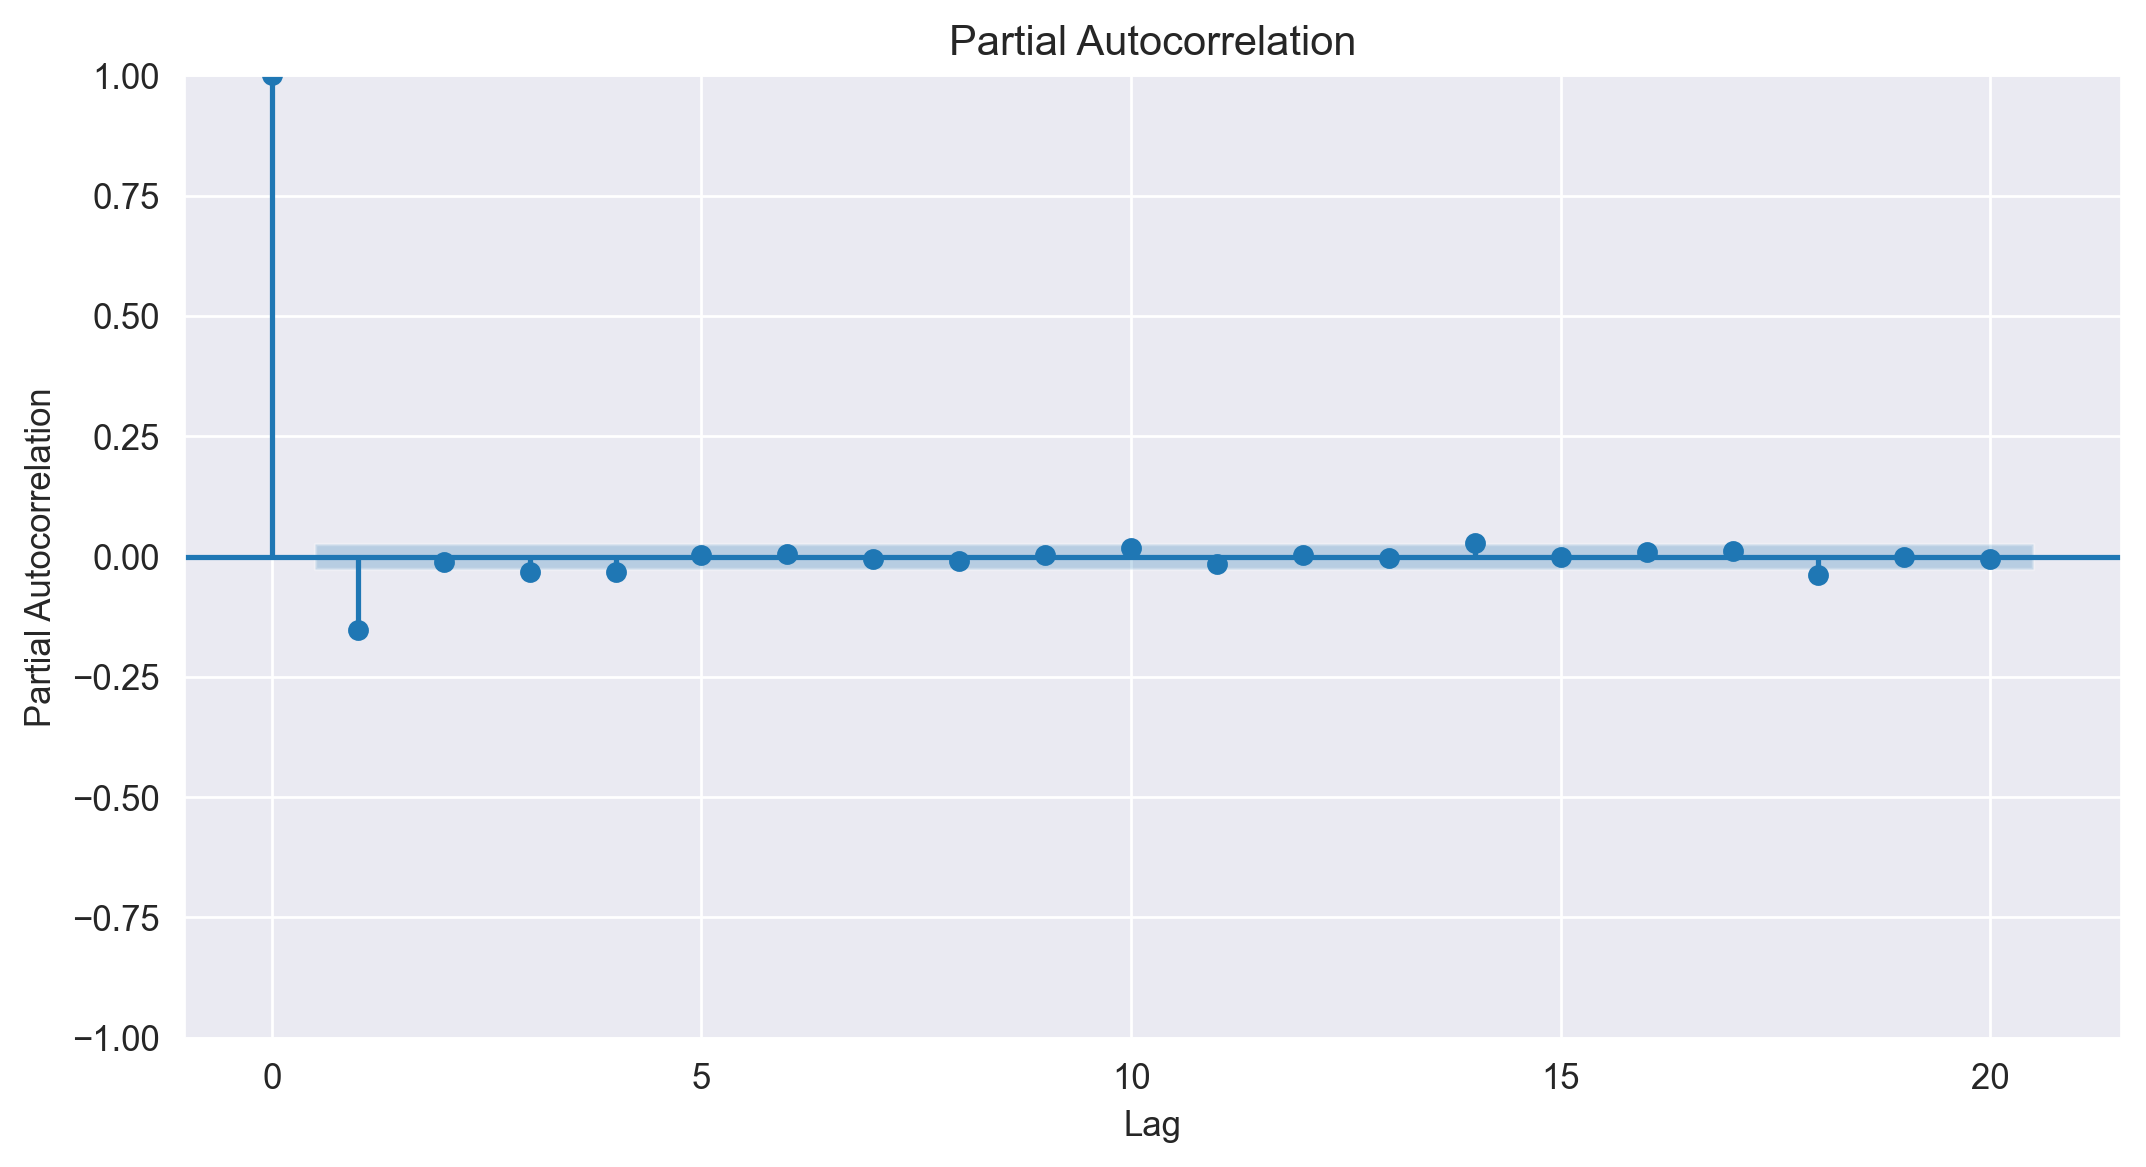

In [43]:
#Plot pacf

plot_pacf(data['First_order'], lags=20);
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation');

- In both acf and pacf plot 1st lag shows greater significance.

### Model Building

###### Creating dummy varables for 'Month' parameter

In [44]:
data

,Adj Close,Volume,Month,Year,log_Adj_Close,log_Volume,First_order
Date,,,,,,,
2000-01-04,32.06,61320457.0,Jan,2000,3.467609,17.931624,2.38
2000-01-05,33.32,173426953.0,Jan,2000,3.506158,18.971267,1.26
2000-01-06,34.71,101355113.0,Jan,2000,3.547028,18.434141,1.39
2000-01-07,37.10,128426756.0,Jan,2000,3.613617,18.670869,2.39
2000-01-10,36.38,86714866.0,Jan,2000,3.594019,18.278136,-0.72
...,...,...,...,...,...,...,...
2022-12-26,2524.05,2764496.0,Dec,2022,7.833620,14.832369,21.85
2022-12-27,2544.70,2659749.0,Dec,2022,7.841768,14.793742,20.65
2022-12-28,2544.45,3442509.0,Dec,2022,7.841670,15.051711,-0.25


In [45]:
dummy_var = pd.get_dummies(data['Month'], prefix='', prefix_sep='')

#Rearrenged months in sequence.
dummy_var = dummy_var[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
dummy_var

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,
2000-01-04,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-05,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-06,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-07,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-10,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0,0,0,0,0,0,0,0,0,0,0,1
2022-12-27,0,0,0,0,0,0,0,0,0,0,0,1
2022-12-28,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
#Merge dummy_var into main dataset.

data = pd.concat([data, dummy_var], axis=1)
data

,Adj Close,Volume,Month,Year,log_Adj_Close,log_Volume,First_order,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,,,,,,
2000-01-04,32.06,61320457.0,Jan,2000,3.467609,17.931624,2.38,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-05,33.32,173426953.0,Jan,2000,3.506158,18.971267,1.26,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-06,34.71,101355113.0,Jan,2000,3.547028,18.434141,1.39,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-07,37.10,128426756.0,Jan,2000,3.613617,18.670869,2.39,1,0,0,0,0,0,0,0,0,0,0,0
2000-01-10,36.38,86714866.0,Jan,2000,3.594019,18.278136,-0.72,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2524.05,2764496.0,Dec,2022,7.833620,14.832369,21.85,0,0,0,0,0,0,0,0,0,0,0,1
2022-12-27,2544.70,2659749.0,Dec,2022,7.841768,14.793742,20.65,0,0,0,0,0,0,0,0,0,0,0,1
2022-12-28,2544.45,3442509.0,Dec,2022,7.841670,15.051711,-0.25,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
#Removing 'month' and 'Year' variable because they are not useful for model building.

data.drop(['Month', 'Year','Volume','log_Volume','First_order'], axis=1, inplace=True)

In [48]:
#Adding time-'t' variable.
data['t'] = np.arange(1,5755)

#Adding t_square
data['t_square'] = np.square(data['t'])

#Rename 'Adj Close' to 'Adj_Close'
data.rename({'Adj Close' : 'Adj_Close'}, axis=1, inplace=True)

#Final data for model building.
data

,Adj_Close,log_Adj_Close,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
Date,,,,,,,,,,,,,,,,
2000-01-04,32.06,3.467609,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2000-01-05,33.32,3.506158,1,0,0,0,0,0,0,0,0,0,0,0,2,4
2000-01-06,34.71,3.547028,1,0,0,0,0,0,0,0,0,0,0,0,3,9
2000-01-07,37.10,3.613617,1,0,0,0,0,0,0,0,0,0,0,0,4,16
2000-01-10,36.38,3.594019,1,0,0,0,0,0,0,0,0,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2524.05,7.833620,0,0,0,0,0,0,0,0,0,0,0,1,5750,33062500
2022-12-27,2544.70,7.841768,0,0,0,0,0,0,0,0,0,0,0,1,5751,33074001
2022-12-28,2544.45,7.841670,0,0,0,0,0,0,0,0,0,0,0,1,5752,33085504


#### Data Split

- Split the last year into a test set to build a model to predict stock price.

In [49]:
data

,Adj_Close,log_Adj_Close,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
Date,,,,,,,,,,,,,,,,
2000-01-04,32.06,3.467609,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2000-01-05,33.32,3.506158,1,0,0,0,0,0,0,0,0,0,0,0,2,4
2000-01-06,34.71,3.547028,1,0,0,0,0,0,0,0,0,0,0,0,3,9
2000-01-07,37.10,3.613617,1,0,0,0,0,0,0,0,0,0,0,0,4,16
2000-01-10,36.38,3.594019,1,0,0,0,0,0,0,0,0,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2524.05,7.833620,0,0,0,0,0,0,0,0,0,0,0,1,5750,33062500
2022-12-27,2544.70,7.841768,0,0,0,0,0,0,0,0,0,0,0,1,5751,33074001
2022-12-28,2544.45,7.841670,0,0,0,0,0,0,0,0,0,0,0,1,5752,33085504


In [50]:
#For training data we take observations between-'2000-01-04' to '2021-12-31'.
train = data.loc['2000-01-04':'2021-12-31']      # First 21 years.

#For testing data we take observations between- '2022-01-01' to '2022-12-30'.
test = data.loc['2022-01-01':'2022-12-31']       # Last 1 year.

In [51]:
#Training data
train

,Adj_Close,log_Adj_Close,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
Date,,,,,,,,,,,,,,,,
2000-01-04,32.06,3.467609,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2000-01-05,33.32,3.506158,1,0,0,0,0,0,0,0,0,0,0,0,2,4
2000-01-06,34.71,3.547028,1,0,0,0,0,0,0,0,0,0,0,0,3,9
2000-01-07,37.10,3.613617,1,0,0,0,0,0,0,0,0,0,0,0,4,16
2000-01-10,36.38,3.594019,1,0,0,0,0,0,0,0,0,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2363.14,7.767747,0,0,0,0,0,0,0,0,0,0,0,1,5502,30272004
2021-12-28,2391.20,7.779551,0,0,0,0,0,0,0,0,0,0,0,1,5503,30283009
2021-12-29,2395.29,7.781260,0,0,0,0,0,0,0,0,0,0,0,1,5504,30294016


In [52]:
#Testing data
test

,Adj_Close,log_Adj_Close,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
Date,,,,,,,,,,,,,,,,
2022-01-03,2396.63,7.781819,1,0,0,0,0,0,0,0,0,0,0,0,5507,30327049
2022-01-04,2450.72,7.804137,1,0,0,0,0,0,0,0,0,0,0,0,5508,30338064
2022-01-05,2462.19,7.808806,1,0,0,0,0,0,0,0,0,0,0,0,5509,30349081
2022-01-06,2409.25,7.787071,1,0,0,0,0,0,0,0,0,0,0,0,5510,30360100
2022-01-07,2428.69,7.795107,1,0,0,0,0,0,0,0,0,0,0,0,5511,30371121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2524.05,7.833620,0,0,0,0,0,0,0,0,0,0,0,1,5750,33062500
2022-12-27,2544.70,7.841768,0,0,0,0,0,0,0,0,0,0,0,1,5751,33074001
2022-12-28,2544.45,7.841670,0,0,0,0,0,0,0,0,0,0,0,1,5752,33085504


#### Data Driven  Methods:

###### 1) Moving Average Method

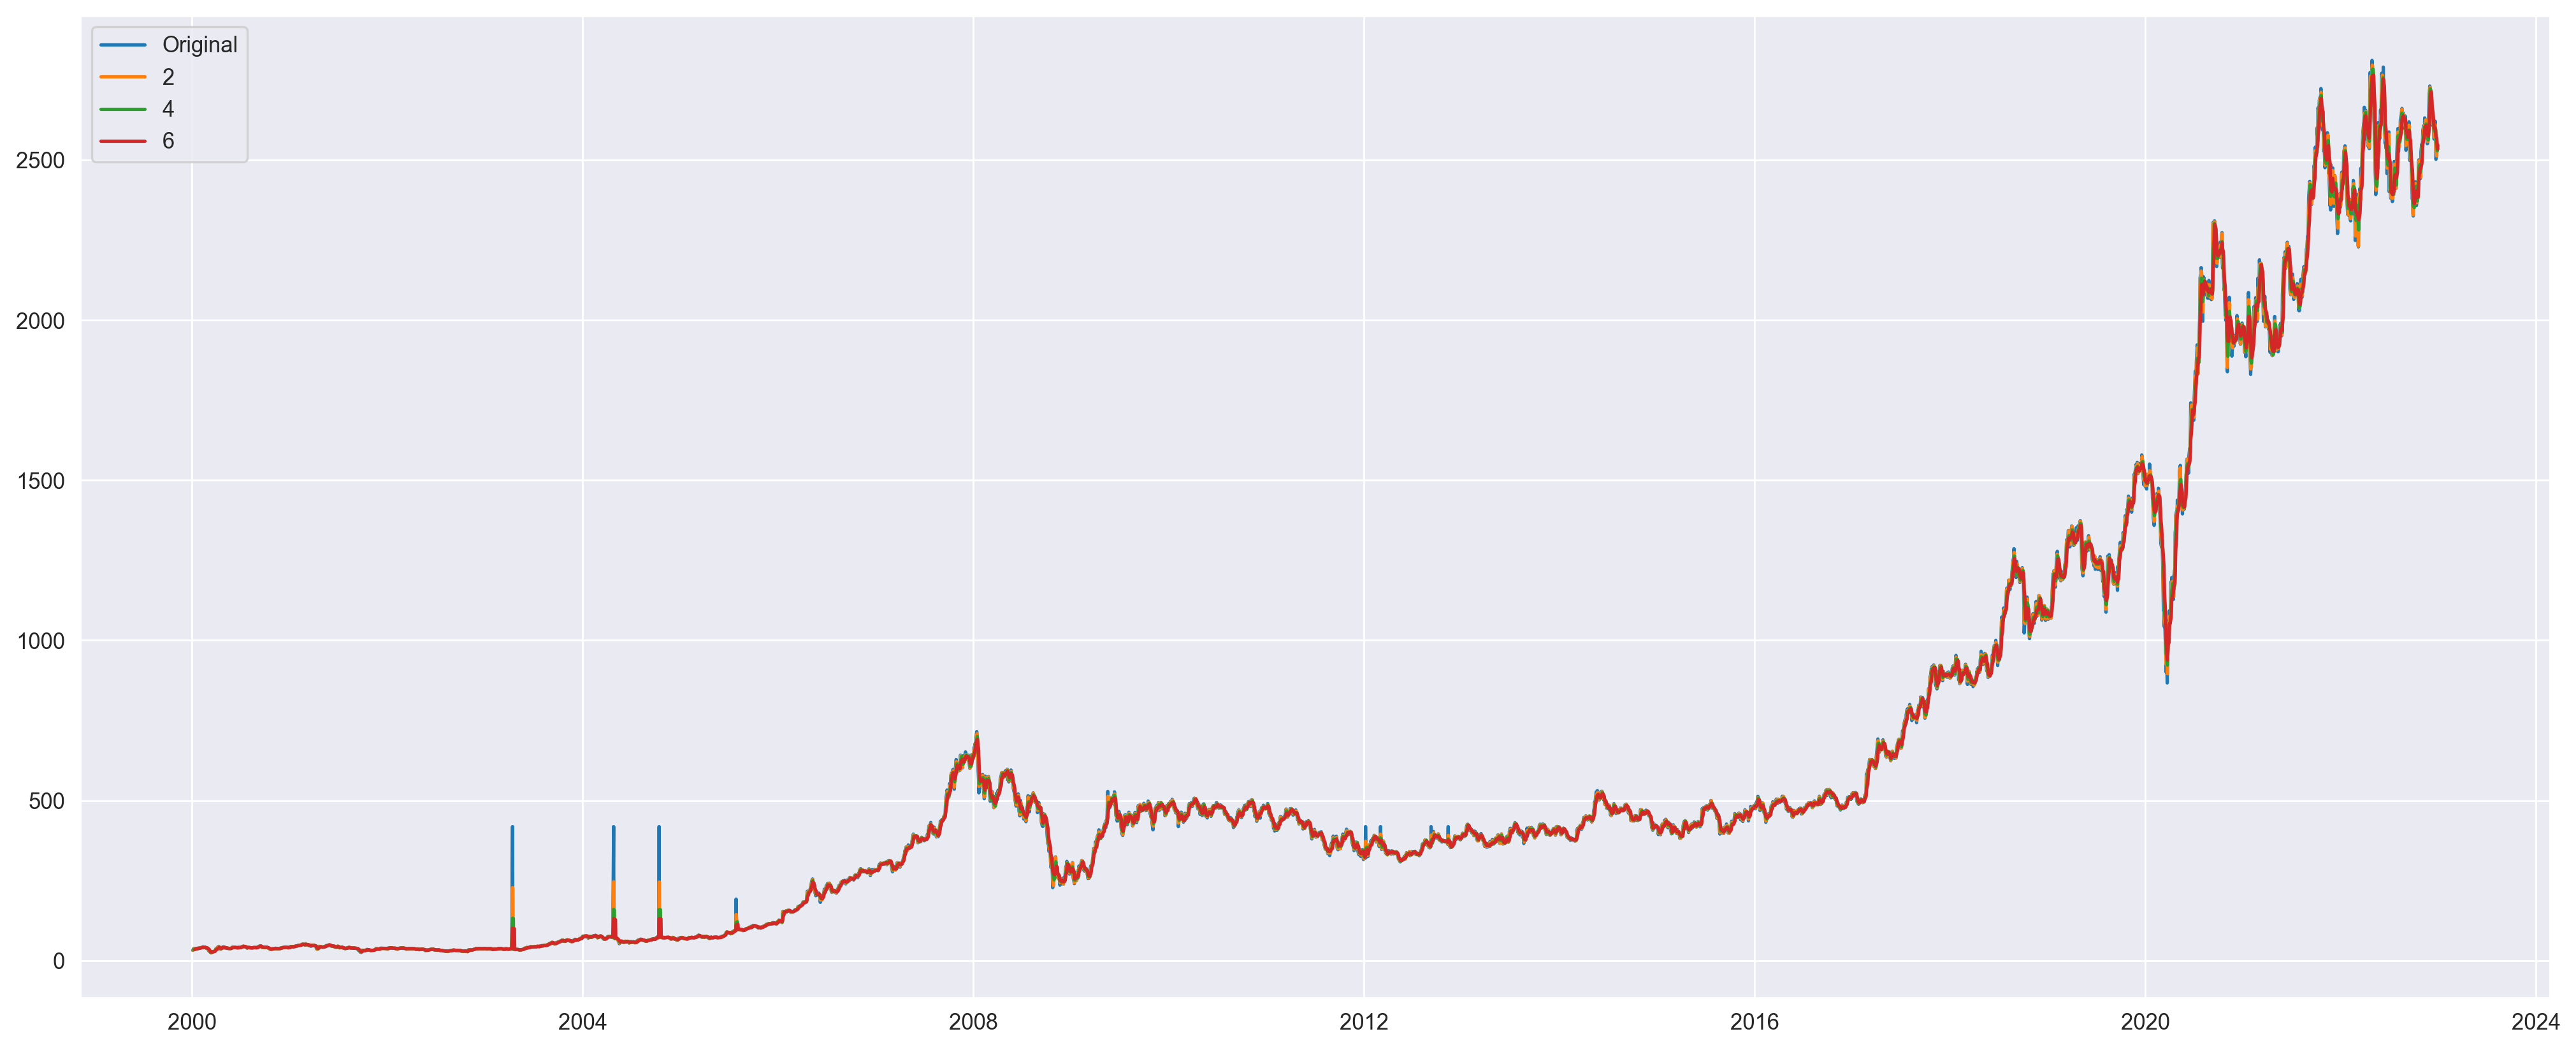

In [53]:
plt.figure(figsize=(20,8), dpi=250)
plt.plot(data['Adj_Close'], label='Original')
plt.plot(data['Adj_Close'].rolling(2).mean(), label='2')
plt.plot(data['Adj_Close'].rolling(4).mean(), label='4')
plt.plot(data['Adj_Close'].rolling(6).mean(), label='6')
plt.legend();

###### 2) Exponential Smoothing

In [54]:
#Libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

1) Simple Exponential Smoothing Method.

In [55]:
sim_exp = SimpleExpSmoothing(train['Adj_Close']).fit(smoothing_level=0.2)
pred_sim_exp = sim_exp.predict(start=5506, end=5753)
RMSE_se = np.sqrt(mean_squared_error(test['Adj_Close'], pred_sim_exp))
print('RMSE = ', round(RMSE_se, 3))

RMSE =  198.776


2) Holts Method.

In [56]:
holts = Holt(train['Adj_Close']).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_holts = holts.predict(start=5506, end=5753)
RMSE_h = np.sqrt(mean_squared_error(test['Adj_Close'], pred_holts))
print('RMSE = ', round(RMSE_h, 3))

RMSE =  366.738


3) Holt-Winters Method.

i) Holts winter exponential smoothing with additive seasonality and additive trend.

In [57]:
hw_exp_1 = ExponentialSmoothing(train['Adj_Close'], seasonal='additive', trend='additive', seasonal_periods=12).fit()
pred_hw_exp_1 = hw_exp_1.predict(start=5506, end=5753)
RMSE_hwe_1 = np.sqrt(mean_squared_error(test['Adj_Close'], pred_hw_exp_1))
print('RMSE = ', round(RMSE_hwe_1, 3))

RMSE =  125.47


ii) Holts winter exponential smoothing with multiplicative seasonality and additive trend.

In [58]:
hw_exp_2 = ExponentialSmoothing(train['Adj_Close'], seasonal='multiplicative', trend='additive', seasonal_periods=12).fit()
pred_hw_exp_2 = hw_exp_2.predict(start=5506, end=5753)
RMSE_hwe_2 = np.sqrt(mean_squared_error(test['Adj_Close'], pred_hw_exp_2))
print('RMSE = ', round(RMSE_hwe_2, 3))

RMSE =  155.424


In [59]:
#Exponential Smoothing Models.

df1 = pd.DataFrame({
    'Models' : ['sim_exp', 'holts', 'hw_exp_1', 'hw_exp_2'],
    'RMSE' : [RMSE_se, RMSE_h, RMSE_hwe_1, RMSE_hwe_2]
}) 

In [60]:
df1.sort_values(['RMSE'], inplace=True)
df1.reset_index(drop=True, inplace=True)
df1

,Models,RMSE
0,hw_exp_1,125.470075
1,hw_exp_2,155.424155
2,sim_exp,198.775624
3,holts,366.738245


#### Model Based Methods:-

In [61]:
#Library
import statsmodels.formula.api as smf

1) Linear Model

In [62]:
linear_model = smf.ols('Adj_Close ~ t', data=train).fit()
pred_linear = linear_model.predict(test['t'])
RMSE_linear = np.sqrt(mean_squared_error(test['Adj_Close'], pred_linear))
print('RMSE = ', RMSE_linear)

RMSE =  1172.4026434564837


2) Exponential Model

In [63]:
Exponential_model  = smf.ols('log_Adj_Close ~ t', data=train).fit()
pred_exp = Exponential_model.predict(test['t'])
RMSE_exp = np.sqrt(mean_squared_error(test['Adj_Close'], np.exp(pred_exp)))
print('RMSE = ', RMSE_exp)

RMSE =  245.1970014811107


3) Quadratic Model

In [64]:
Quadratic_model  = smf.ols('Adj_Close ~ t+t_square', data=train).fit()
pred_quad = Quadratic_model.predict(test[['t', 't_square']])
RMSE_quad = np.sqrt(mean_squared_error(test['Adj_Close'], pred_quad))
print('RMSE = ', RMSE_quad)

RMSE =  621.5602104923123


4) Additive Seasonality

In [65]:
add_sea  = smf.ols('Adj_Close ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_add_sea = add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
RMSE_add_sea = np.sqrt(mean_squared_error(test['Adj_Close'], pred_add_sea))
print('RMSE = ', RMSE_add_sea)

RMSE =  1997.896834129638


5) Additive Seasonality With Quadratic Trend

In [66]:
add_sea_quad  = smf.ols('Adj_Close ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_add_sea_quad = add_sea_quad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
RMSE_add_sea_quad = np.sqrt(mean_squared_error(test['Adj_Close'], pred_add_sea_quad))
print('RMSE = ', RMSE_add_sea_quad)

RMSE =  625.4327305430483


6) Multiplicative Seasonality

In [67]:
multi_sea  = smf.ols('log_Adj_Close ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_multi_sea = multi_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
RMSE_multi_sea = np.sqrt(mean_squared_error(test['Adj_Close'], np.exp(pred_multi_sea)))
print('RMSE = ', RMSE_multi_sea)

RMSE =  2239.865607132074


7) Multiplicative Seasonality With additive(linear) Trend

In [68]:
multi_sea_add  = smf.ols('log_Adj_Close ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_multi_sea_add = multi_sea_add.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
RMSE_multi_sea_add = np.sqrt(mean_squared_error(test['Adj_Close'], np.exp(pred_multi_sea_add)))
print('RMSE = ', RMSE_multi_sea_add)

RMSE =  253.2422377181512


In [69]:
#Model based methods.

df2 = pd.DataFrame({
    'Models' : ['linear_model','Exponential_model','Quadratic_model','add_sea','add_sea_quad','multi_sea','multi_sea_add'],
    'RMSE' : [RMSE_linear, RMSE_exp, RMSE_quad, RMSE_add_sea, RMSE_add_sea_quad, RMSE_multi_sea, RMSE_multi_sea_add]
})

In [70]:
df2.sort_values(['RMSE'], inplace=True)
df2.reset_index(drop=True, inplace=True)
df2

,Models,RMSE
0,Exponential_model,245.197001
1,multi_sea_add,253.242238
2,Quadratic_model,621.560210
3,add_sea_quad,625.432731
4,linear_model,1172.402643
5,add_sea,1997.896834
6,multi_sea,2239.865607


#### ARIMA

In [71]:
#Libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [72]:
order = auto_arima(data['Adj_Close'])
order

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [73]:
arima_model = ARIMA(train['Adj_Close'], order=(4, 1, 0)).fit()
pred_arima = arima_model.predict(start=5506, end=5753)
RMSE_arima = np.sqrt((mean_squared_error(test['Adj_Close'], pred_arima)))
print('RMSE = ', RMSE_arima)

RMSE =  202.29846153746652


In [74]:
#ARIMA model.

df3 = pd.DataFrame({
    'Models' : ['arima_model'],
    'RMSE' : [RMSE_arima]
})

In [75]:
df3

,Models,RMSE
0,arima_model,202.298462


In [76]:
#Merge df2 and df3 dataframes.

df = pd.concat([df2,df3], axis=0)
df.sort_values(['RMSE'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Models,RMSE
0,arima_model,202.298462
1,Exponential_model,245.197001
2,multi_sea_add,253.242238
3,Quadratic_model,621.560210
4,add_sea_quad,625.432731
5,linear_model,1172.402643
6,add_sea,1997.896834
7,multi_sea,2239.865607


- ARIMA model gives lowest RMSE value.

#### Business Objective:
Predict the Reliance Industries Stock Price for the next 1 year.

###### Combining training and testing data

In [77]:
data

,Adj_Close,log_Adj_Close,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
Date,,,,,,,,,,,,,,,,
2000-01-04,32.06,3.467609,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2000-01-05,33.32,3.506158,1,0,0,0,0,0,0,0,0,0,0,0,2,4
2000-01-06,34.71,3.547028,1,0,0,0,0,0,0,0,0,0,0,0,3,9
2000-01-07,37.10,3.613617,1,0,0,0,0,0,0,0,0,0,0,0,4,16
2000-01-10,36.38,3.594019,1,0,0,0,0,0,0,0,0,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,2524.05,7.833620,0,0,0,0,0,0,0,0,0,0,0,1,5750,33062500
2022-12-27,2544.70,7.841768,0,0,0,0,0,0,0,0,0,0,0,1,5751,33074001
2022-12-28,2544.45,7.841670,0,0,0,0,0,0,0,0,0,0,0,1,5752,33085504


###### Data for prediction (next 1 year)

In [78]:
data_new = pd.DataFrame({
    "Date" : pd.date_range(start='01/01/2023',end='31/12/2023')
})

data_new

,Date
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
360,2023-12-27
361,2023-12-28
362,2023-12-29
363,2023-12-30


In [79]:
#Holidays in year 2023.
national_holidays = pd.DataFrame({
    'Date' : ['07-Mar-23','30-Mar-23','04-Apr-23','07-Apr-23','14-Apr-23','01-May-23','29-Jun-23','15-Aug-23',
                 '19-Sep-23','02-Oct-23','24-Oct-23','14-Nov-23','27-Nov-23','25-Dec-23']})

#Saturdays in year 2023.
saturday = pd.DataFrame({
    'Date' : ['07-Jan-23','14-Jan-23','21-Jan-23','28-Jan-23','04-Feb-23','11-Feb-23','18-Feb-23','25-Feb-23','04-Mar-23',
              '11-Mar-23','18-Mar-23','25-Mar-23','01-Apr-23','08-Apr-23','15-Apr-23','22-Apr-23','29-Apr-23','06-May-23',
              '13-May-23','20-May-23','27-May-23','03-Jun-23','10-Jun-23','17-Jun-23','24-Jun-23','01-Jul-23','08-Jul-23',
              '15-Jul-23','22-Jul-23','29-Jul-23','05-Aug-23','12-Aug-23','19-Aug-23','26-Aug-23','02-Sep-23','09-Sep-23',
              '16-Sep-23','23-Sep-23','30-Sep-23','07-Oct-23','14-Oct-23','21-Oct-23','28-Oct-23','04-Nov-23','11-Nov-23',
              '18-Nov-23','25-Nov-23','02-Dec-23','09-Dec-23','16-Dec-23','23-Dec-23','30-Dec-23']})

#Sundays in year 2023.
sunday = pd.DataFrame({
    'Date' : ['01-Jan-23','08-Jan-23','15-Jan-23','22-Jan-23','29-Jan-23','05-Feb-23','12-Feb-23','19-Feb-23','26-Feb-23',
              '05-Mar-23','12-Mar-23','19-Mar-23','26-Mar-23','02-Apr-23','09-Apr-23','16-Apr-23','23-Apr-23','30-Apr-23',
              '07-May-23','14-May-23','21-May-23','28-May-23','04-Jun-23','11-Jun-23','18-Jun-23','25-Jun-23','02-Jul-23',
              '09-Jul-23','16-Jul-23','23-Jul-23','30-Jul-23','06-Aug-23','13-Aug-23','20-Aug-23','27-Aug-23','03-Sep-23',
              '10-Sep-23','17-Sep-23','24-Sep-23','01-Oct-23','08-Oct-23','15-Oct-23','22-Oct-23','29-Oct-23','05-Nov-23',
              '12-Nov-23','19-Nov-23','26-Nov-23','03-Dec-23','10-Dec-23','17-Dec-23','24-Dec-23','31-Dec-23']})


In [80]:
#Merge all market off days in year 2023.

Holidays = pd.concat([saturday,sunday,national_holidays])
Holidays['Date'] = pd.DatetimeIndex(Holidays['Date'])
Holidays

,Date
0,2023-01-07
1,2023-01-14
2,2023-01-21
3,2023-01-28
4,2023-02-04
...,...
9,2023-10-02
10,2023-10-24
11,2023-11-14
12,2023-11-27


- Stock market will close for 119 days in year 2023.

In [81]:
#Concat data_new and Holidays.
data_pred = pd.concat([data_new,Holidays])

#Remove all Duplicates.
data_pred.drop_duplicates(keep=False, inplace=True)

#Reset index.
data_pred.reset_index(drop=True,inplace=True)

data_pred

,Date
0,2023-01-02
1,2023-01-03
2,2023-01-04
3,2023-01-05
4,2023-01-06
...,...
241,2023-12-22
242,2023-12-26
243,2023-12-27
244,2023-12-28


- Stock market will open for 246 days in year 2023.

In [82]:
#Adding time 't'
data_pred['t'] = np.arange(5755,6001)

#Adding t square.
data_pred['t_square'] = np.square(data_pred['t'])

#Extracting Month from Date.
data_pred['Month'] = data_pred.Date.dt.strftime("%b")

data_pred

,Date,t,t_square,Month
0,2023-01-02,5755,33120025,Jan
1,2023-01-03,5756,33131536,Jan
2,2023-01-04,5757,33143049,Jan
3,2023-01-05,5758,33154564,Jan
4,2023-01-06,5759,33166081,Jan
...,...,...,...,...
241,2023-12-22,5996,35952016,Dec
242,2023-12-26,5997,35964009,Dec
243,2023-12-27,5998,35976004,Dec
244,2023-12-28,5999,35988001,Dec


In [83]:
#set Date as a index.
data_pred.set_index('Date', inplace=True)
data_pred

,t,t_square,Month
Date,,,
2023-01-02,5755,33120025,Jan
2023-01-03,5756,33131536,Jan
2023-01-04,5757,33143049,Jan
2023-01-05,5758,33154564,Jan
2023-01-06,5759,33166081,Jan
...,...,...,...
2023-12-22,5996,35952016,Dec
2023-12-26,5997,35964009,Dec
2023-12-27,5998,35976004,Dec


In [84]:
#Creating dummmy variables for Month.
dummy_var1 = pd.get_dummies(data_pred['Month'], prefix='', prefix_sep='')

#Rearrenged months in sequence.
dummy_var1 = dummy_var1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
dummy_var1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,
2023-01-02,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-03,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-04,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-05,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-06,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0,0,0,0,0,0,0,0,0,0,0,1
2023-12-26,0,0,0,0,0,0,0,0,0,0,0,1
2023-12-27,0,0,0,0,0,0,0,0,0,0,0,1


In [85]:
#Dropped Month variable.
data_pred.drop('Month', axis=1, inplace=True)

In [86]:
#Merge dummy_var into main dataset.
data_pred = pd.concat([data_pred, dummy_var1], axis=1)
data_pred

,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,
2023-01-02,5755,33120025,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-03,5756,33131536,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-04,5757,33143049,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-05,5758,33154564,1,0,0,0,0,0,0,0,0,0,0,0
2023-01-06,5759,33166081,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,5996,35952016,0,0,0,0,0,0,0,0,0,0,0,1
2023-12-26,5997,35964009,0,0,0,0,0,0,0,0,0,0,0,1
2023-12-27,5998,35976004,0,0,0,0,0,0,0,0,0,0,0,1


#### Model building using ARIMA.

In [87]:
data1 = pd.concat([data,data_pred])
data1

,Adj_Close,log_Adj_Close,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
Date,,,,,,,,,,,,,,,,
2000-01-04,32.06,3.467609,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2000-01-05,33.32,3.506158,1,0,0,0,0,0,0,0,0,0,0,0,2,4
2000-01-06,34.71,3.547028,1,0,0,0,0,0,0,0,0,0,0,0,3,9
2000-01-07,37.10,3.613617,1,0,0,0,0,0,0,0,0,0,0,0,4,16
2000-01-10,36.38,3.594019,1,0,0,0,0,0,0,0,0,0,0,0,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,5996,35952016
2023-12-26,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,5997,35964009
2023-12-27,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,5998,35976004


In [88]:
order = auto_arima(data['Adj_Close'])
order

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [89]:
arima_model = ARIMA(data['Adj_Close'], order=(4, 1, 0)).fit()
pred_arima = arima_model.predict(start=5755, end=6000)
pred_arima

5755    2546.133675
5756    2546.020988
5757    2545.954983
5758    2546.000824
5759    2545.993227
           ...     
5996    2545.998142
5997    2545.998142
5998    2545.998142
5999    2545.998142
6000    2545.998142
Name: predicted_mean, Length: 246, dtype: float64

In [90]:
data_pred['Adj_close_pred'] = pred_arima.values
data_pred

,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Adj_close_pred
Date,,,,,,,,,,,,,,,
2023-01-02,5755,33120025,1,0,0,0,0,0,0,0,0,0,0,0,2546.133675
2023-01-03,5756,33131536,1,0,0,0,0,0,0,0,0,0,0,0,2546.020988
2023-01-04,5757,33143049,1,0,0,0,0,0,0,0,0,0,0,0,2545.954983
2023-01-05,5758,33154564,1,0,0,0,0,0,0,0,0,0,0,0,2546.000824
2023-01-06,5759,33166081,1,0,0,0,0,0,0,0,0,0,0,0,2545.993227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,5996,35952016,0,0,0,0,0,0,0,0,0,0,0,1,2545.998142
2023-12-26,5997,35964009,0,0,0,0,0,0,0,0,0,0,0,1,2545.998142
2023-12-27,5998,35976004,0,0,0,0,0,0,0,0,0,0,0,1,2545.998142


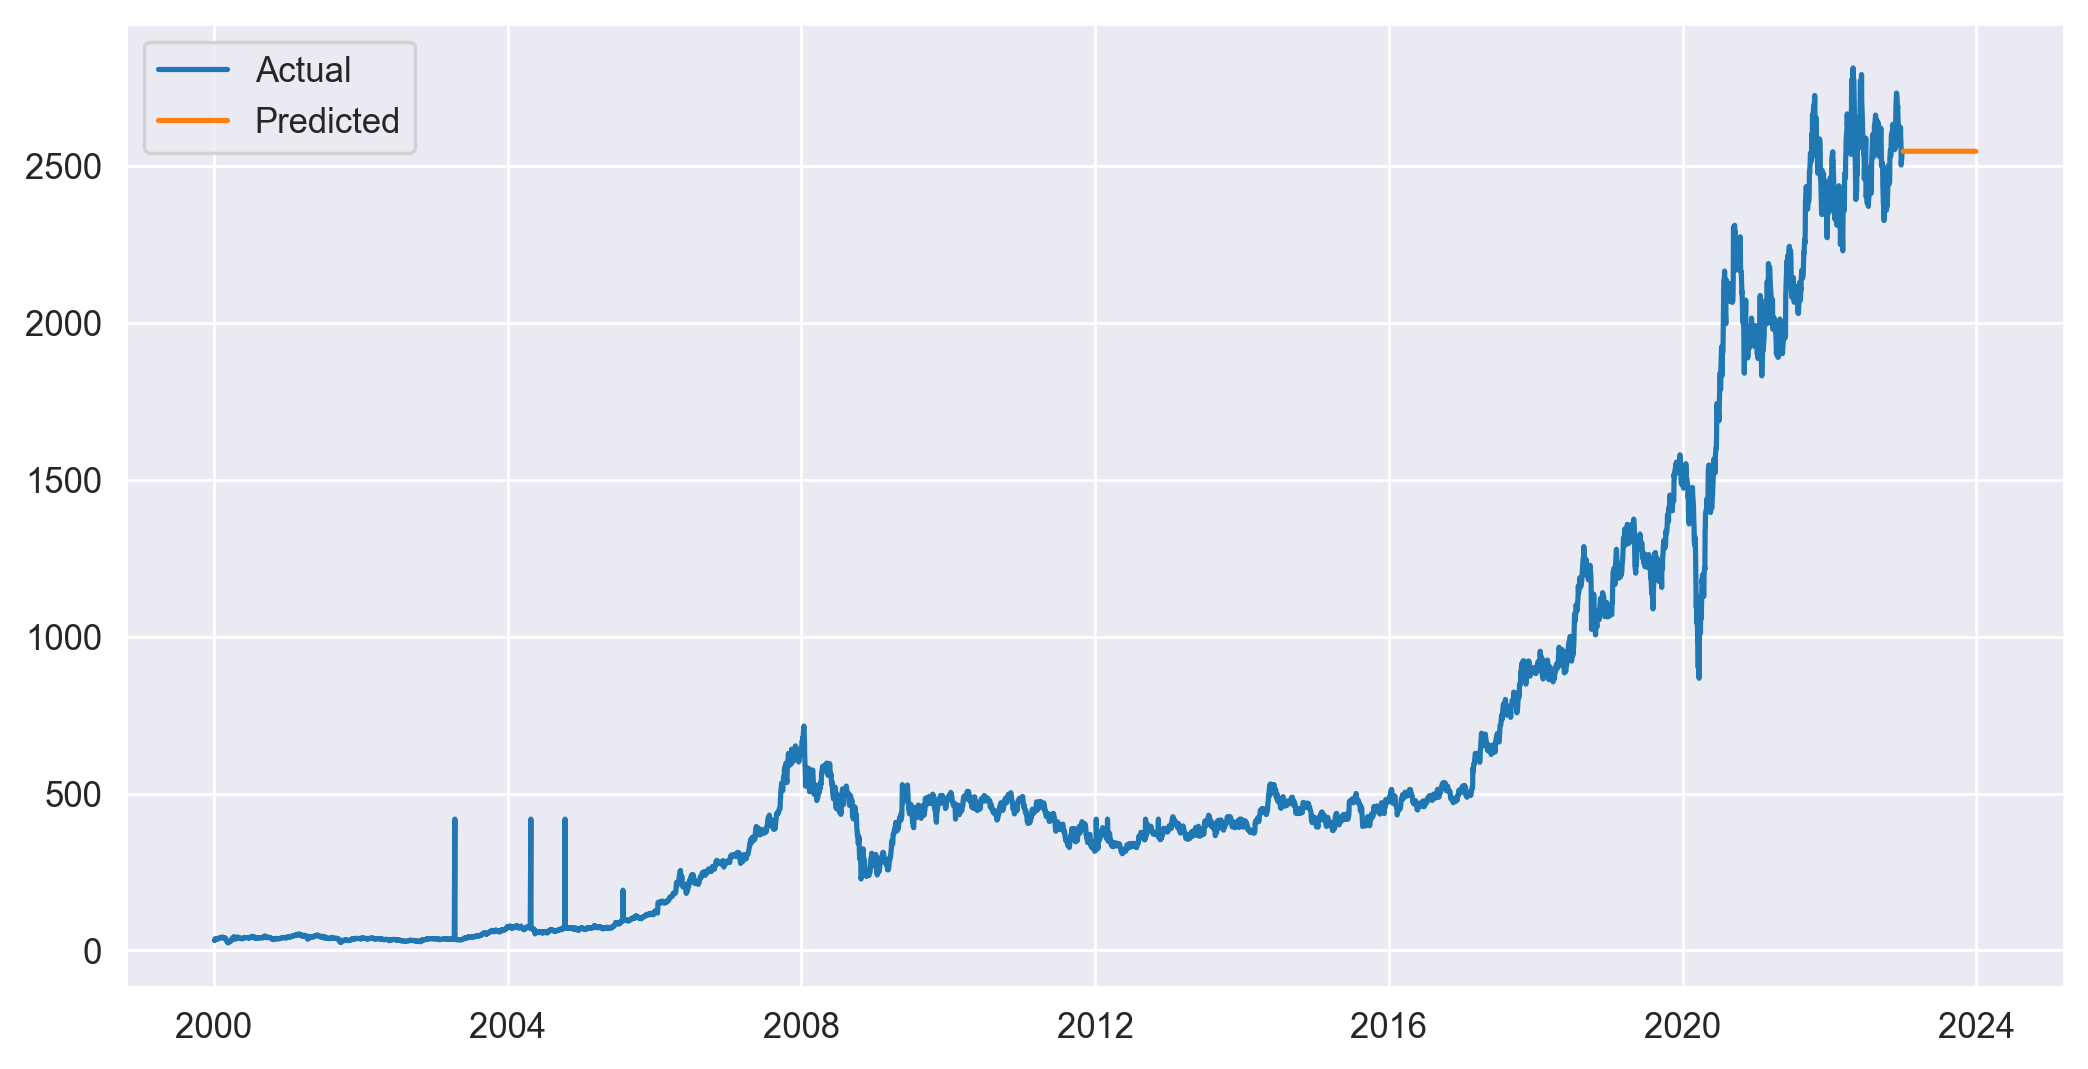

In [91]:
plt.plot(data['Adj_Close'], label='Actual')
plt.plot(data_pred['Adj_close_pred'], label='Predicted')
plt.legend();

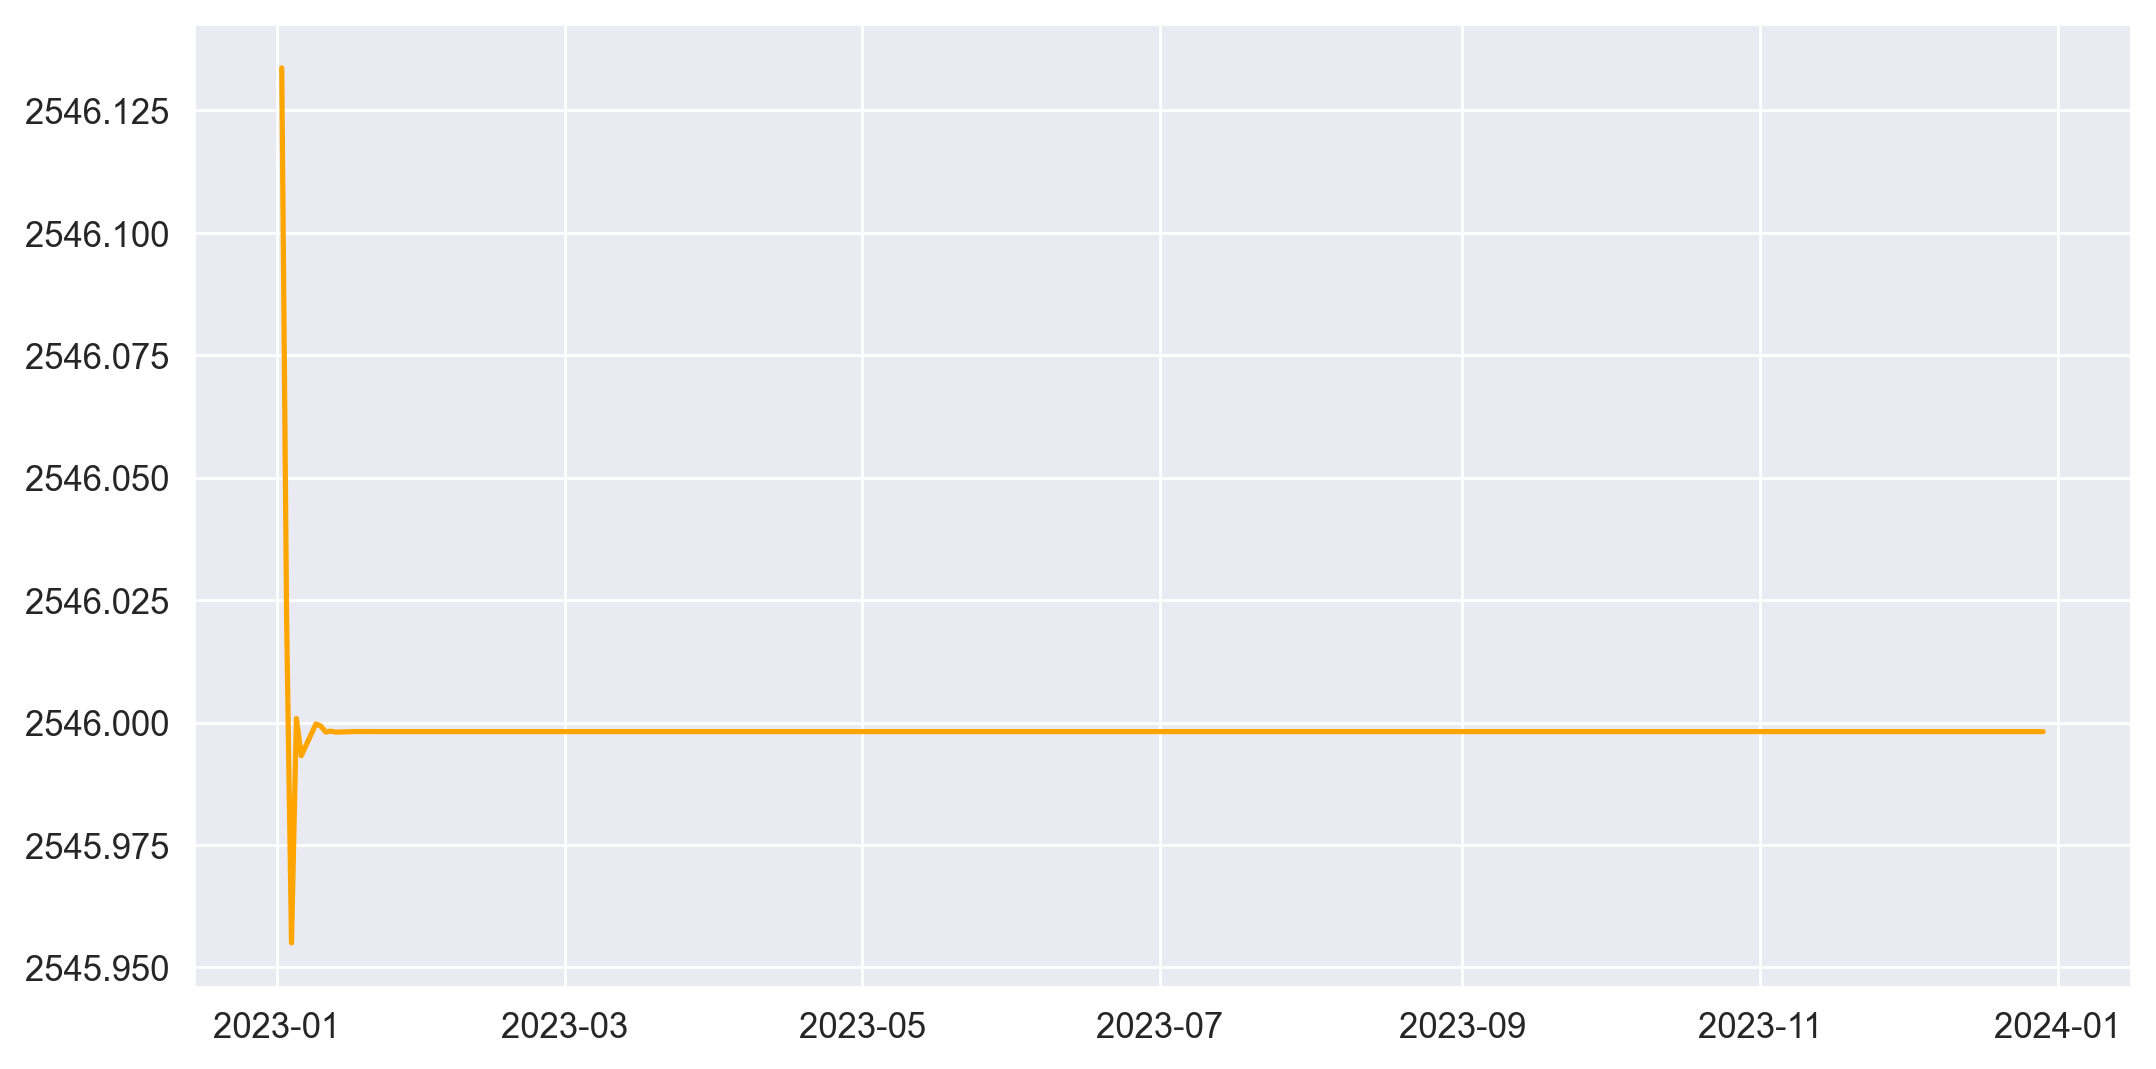

In [92]:
plt.plot(data_pred['Adj_close_pred'], c='orange');

- ARIMA model gives constant straignt line for predicted values.
- We go with the next model which has lowest RMSE value.

#### Final model building using Exponential model.

In [93]:
Exponential_model_pred = smf.ols('log_Adj_Close ~ t', data=data).fit()
pred_exp1 = Exponential_model.predict(data_pred['t'])

np.exp(pred_exp1)

Date
2023-01-02    2541.353846
2023-01-03    2543.202597
2023-01-04    2545.052693
2023-01-05    2546.904135
2023-01-06    2548.756923
                 ...     
2023-12-22    3028.152685
2023-12-26    3030.355567
2023-12-27    3032.560050
2023-12-28    3034.766138
2023-12-29    3036.973830
Length: 246, dtype: float64

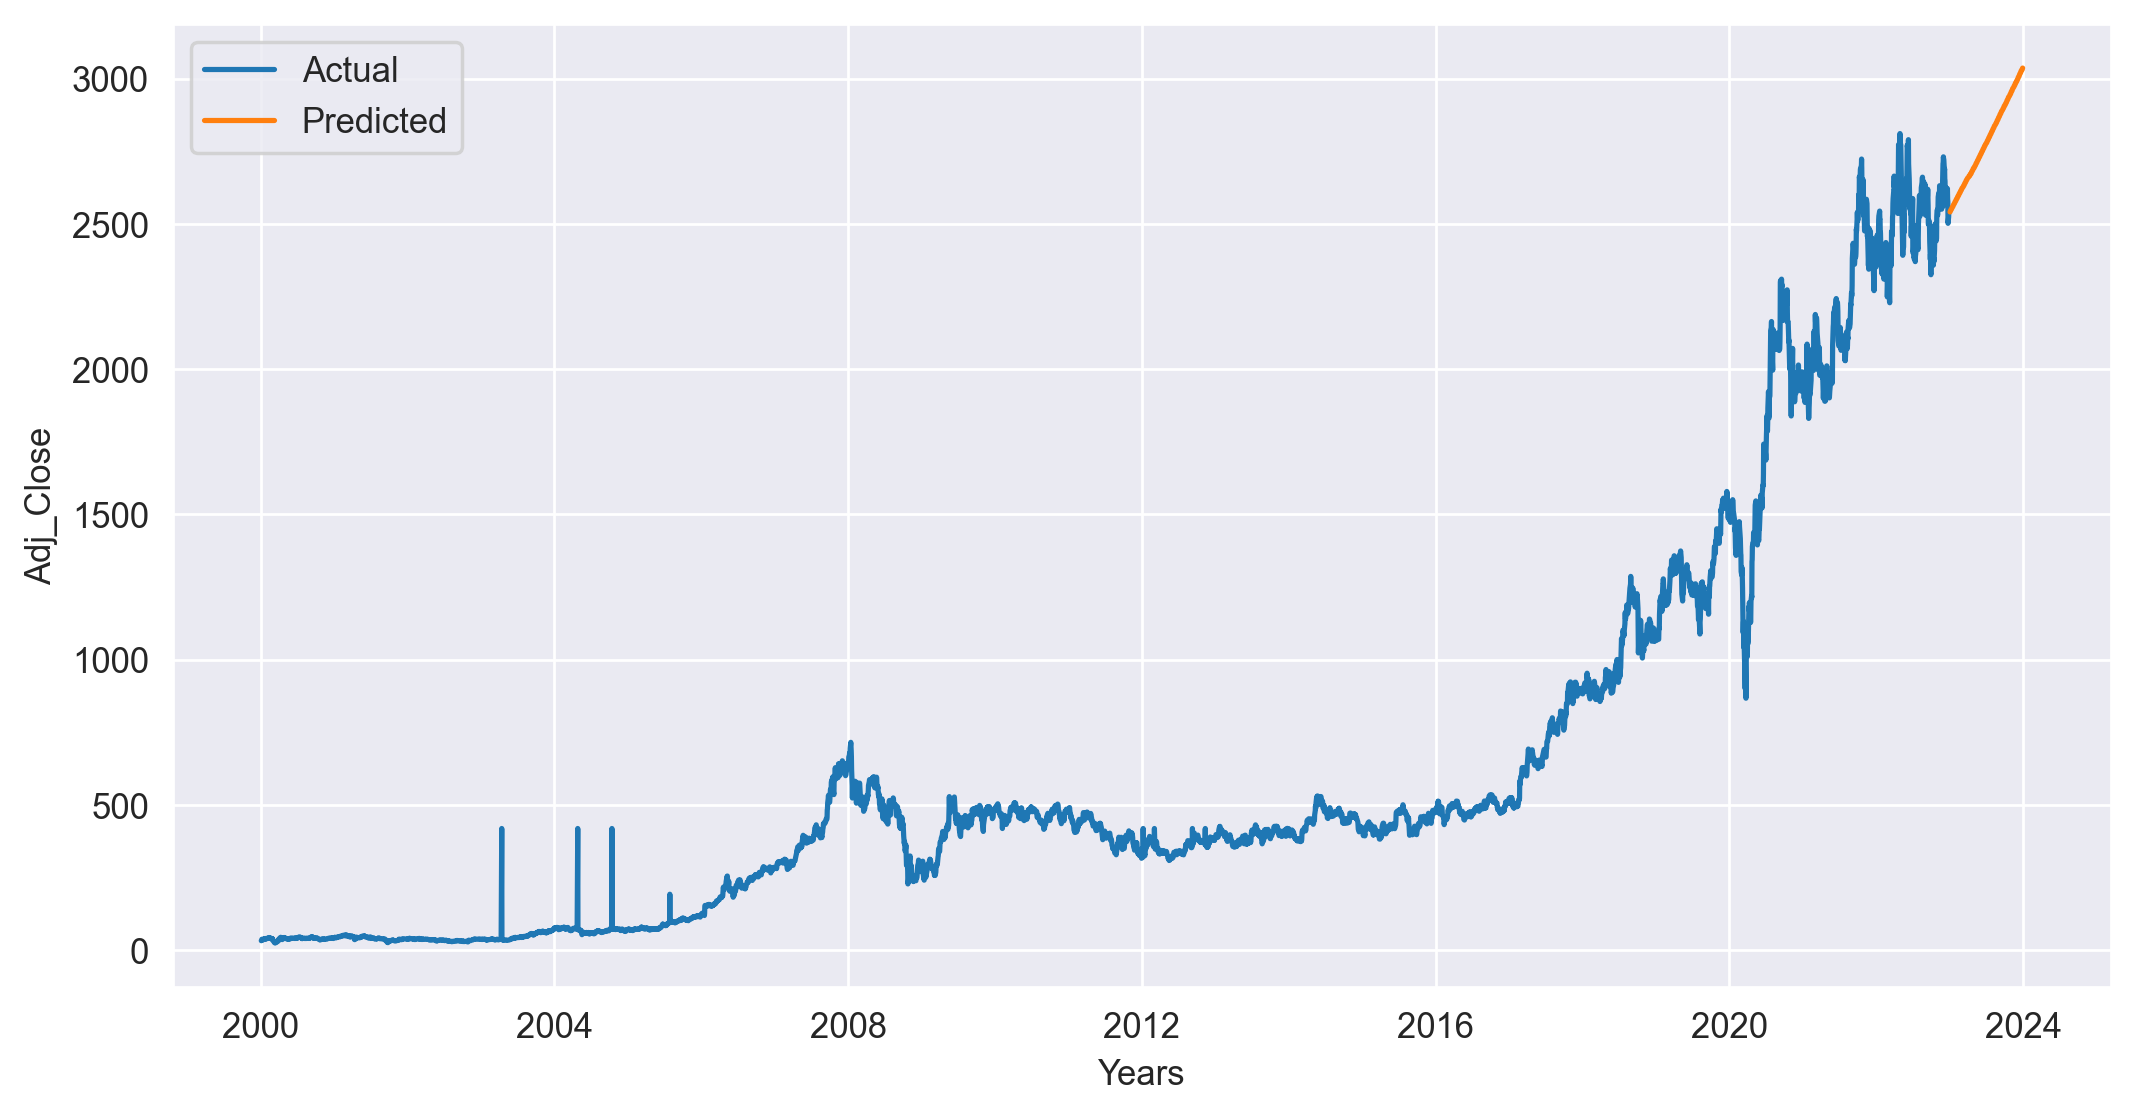

In [94]:
plt.plot(data['Adj_Close'], label='Actual')
plt.plot(np.exp(pred_exp1), label='Predicted')
plt.xlabel('Years')
plt.ylabel('Adj_Close')
plt.legend();

- In this model we get upward trend for predicted values.

#### Save model

In [95]:
import pickle

In [96]:
pickle.dump(Exponential_model_pred, open('model.pkl', 'wb'))

## =======================================================================